# Applied Machine Learning 2: includes exercises on data analysis, PCA, k-means and hierarchical clustering, logistic regression, SVMs, evaluation methods, GMMs

### Import libraries

In [1]:
import os
import platform
import sys
import sklearn
import scipy
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings('ignore')

print("All packages imported!")
print("python=={}".format(platform.python_version()))
print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("scypy=={}".format(scipy.__version__))
print("matplotlib=={}".format(mp.__version__))

# You should see this output:
# python==3.7.6
# seaborn==0.11.0
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# scypy==1.5.3
# matplotlib==3.2.2

All packages imported!
python==3.7.6
seaborn==0.11.0
scikit-learn==0.23.2
pandas==1.1.4
numpy==1.19.4
scypy==1.5.3
matplotlib==3.2.2


\pagebreak

# Part 1 Data analysis

### EMNIST Handwritten Character Dataset

This question employs the [EMNIST handwritten character data set](https://www.nist.gov/itl/iad/image-group/emnist-dataset). Each character image is represented as 28-by-28 pixels in gray scale (ranging from 0 to 255), stored as a row vector of 784 elements (28 × 28 = 784) in column-major order. A subset of the original EMNIST data set is considered in the coursework, restricting characters to English alphabet of 26 letters in lower case. Label numbers are given in alphabetical order, where label 0 corresponds to 'a' and 25 to 'z'. There are 1800 training samples and 300 test samples for each class. Note that you will find some errors (wrong labels and wrong letters) in the data set, but we use the data set as it is.

***Loading data:***
Upload the data set file "data1.mat" to your environment, make sure that you have "helpers.py" in your environment, and run the following cell.

In [2]:
# Load the data set and apply some changes
from helpers import *
Xtrn_org, Ytrn_org, Xtst_org, Ytst_org = load_EMNIST_subset()
Xtrn = Xtrn_org / 255.0   # Training data : (46800, 784)
Xtst = Xtst_org / 255.0   # Testing data : (7800, 784)
Ytrn = Ytrn_org - 1       # Labels for Xtrn : (46800,)
Ytst = Ytst_org - 1       # Labels for Xtst : (7800,)
Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = Xtrn - Xmean; Xtst_nm = Xtst - Xmean  # Mean-normalised versions of data

In [3]:
# Check that the loading of the dataset was done correctly
print('Training data Xtrn: {}'.format(Xtrn.shape))
print('Testing data Xtst: {}'.format(Xtst.shape))
print('Labels for training data Ytrn: {}'.format(Ytrn.shape))
print('Labels for testing data Ytst: {}'.format(Ytst.shape))

Training data Xtrn: (46800, 784)
Testing data Xtst: (7800, 784)
Labels for training data Ytrn: (46800,)
Labels for testing data Ytst: (7800,)


Xtrn and Ytrn are training data and corresponding labels, whereas Xtst and Ytst are test data and labels. Xtrn_nm and Xtst_nm are mean-normalised versions of Xtrn and Xtst, respectively.

\pagebreak

# ========== 1.1 ==========

Show the minimum, maximum, mean, and variance of the pixel values for the first sample in Xtrn.

In [4]:
Xfirst = Xtrn[0,:].reshape(1,784)

print('Minimum of pixel values for first sample in Xtrn: {:.3f}'.format(np.min(Xfirst)))
print('Maximum of pixel values for first sample in Xtrn: {:.3f}'.format(np.max(Xfirst)))
print('Mean of pixel values for first sample in Xtrn: {:.3f}'.format(np.mean(Xfirst)))
print('Variance of pixel values for first sample in Xtrn: {:.3f}'.format(np.var(Xfirst)))

Minimum of pixel values for first sample in Xtrn: 0.000
Maximum of pixel values for first sample in Xtrn: 1.000
Mean of pixel values for first sample in Xtrn: 0.161
Variance of pixel values for first sample in Xtrn: 0.097


\pagebreak

# ========== 1.2 ==========


Display the images of the first and last sample in the training data Xtrn in the following two ways.

1. Display the images using Matplolib's imshow(). You should display images in a gray scale, 
2. Display the images using print() function, where you display a character '\*' when the value of pixel is greater than 0 (zero), and display ' ' (space) otherwise, so that an image is displayed using 28 lines, each of which has the length of 28 characters.

Note that an image of 28-by-28 pixels is stored in a vector of 784 elements in ***colum-major order*** instead of row-major order. You need be careful about the order when you recover the original 28-by-28 array from a vector so that the image is displayed properly.

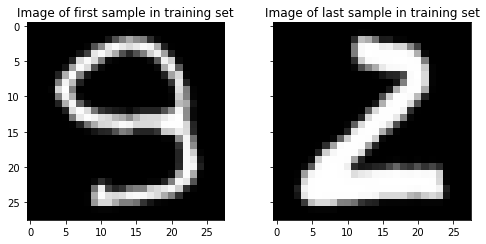

In [5]:
#(1)
# Take the pixel values for the first and last image samples 
# Reshape using Fortran-like ordering since pixel values are stored in a column-major order
Xfirst = Xtrn[0,:].reshape(28, 28, order='F')
Xlast = Xtrn[-1,:].reshape(28, 28, order='F')

# Display images of the first and last sample in Xtrn using Matplotlib's imshow() in gray scale
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7,4))
ax[0].imshow(Xfirst, cmap='gray', vmin=0., vmax=1.)
ax[0].set_title('Image of first sample in training set')
ax[1].imshow(Xlast, cmap='gray', vmin=0., vmax=1.)
ax[1].set_title('Image of last sample in training set')
plt.tight_layout()
plt.show()

In [6]:
#(2)
# Display images by printing '*' and ''(space) characters
# First sample
for i in np.arange(0, 28):
    for j in np.arange(0, 28):
        if Xfirst[i, j] > 0:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print('\n')

                                                        

                            *                           

                      * * * * * * * *                   

                * * * * * * * * * * * * *               

              * * * * * * * * * * * * * *               

            * * * * * * *         * * * * *             

          * * * * * *               * * * *             

        * * * * *                     * * * *           

        * * * *                       * * * *           

      * * * *                           * * * *         

        * * * *                         * * * *         

        * * * * *                       * * * *         

          * * * * * * * * * * * * * * * * * * *         

          * * * * * * * * * * * * * * * * * * *         

            * * * * * * * * * * * * * * * * * *         

                * * * * * * * * * * * * * * * *         

                                      * * * * *         

              

In [7]:
# Last sample
for i in np.arange(0, 28):
    for j in np.arange(0, 28):
        if Xlast[i, j] > 0:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print('\n')

                                                        

                        * *                             

                      * * * * * * * *                   

                      * * * * * * * * * *               

                      * * * * * * * * * * *             

                      * * * * * * * * * * *             

                      * * * * * * * * * * * *           

                            * * * * * * * * *           

                                  * * * * * *           

                                * * * * * * *           

                              * * * * * * *             

                          * * * * * * * *               

                        * * * * * * * * *               

                      * * * * * * * * *                 

                    * * * * * * * * *                   

                    * * * * * * * *                     

                * * * * * * * *                         

            * 

\pagebreak

# ========== 1.3 ==========

Using Xtrn and the Euclidean distance measure, for the first four classes, i.e., 'a','b','c', and 'd', find the two closest samples and four furthest samples of that class to the mean of the class.
1. Display the images of the mean vectors and samples you found in a 4-by-7 grid, where the top row corresponds to the images for class 'a', and the bottom to those for class 'd'. The seven columns are the image of the mean vector and the images of the first and second closest and fourth, third, second, and first furthest samples to the mean vector for that class, respectively (from left to right). For each image sample, you should provide the class number and the sample number in the data set. Note that we use 0-based indexing.
2. Discuss possible issues when we use this data set for classification tasks.

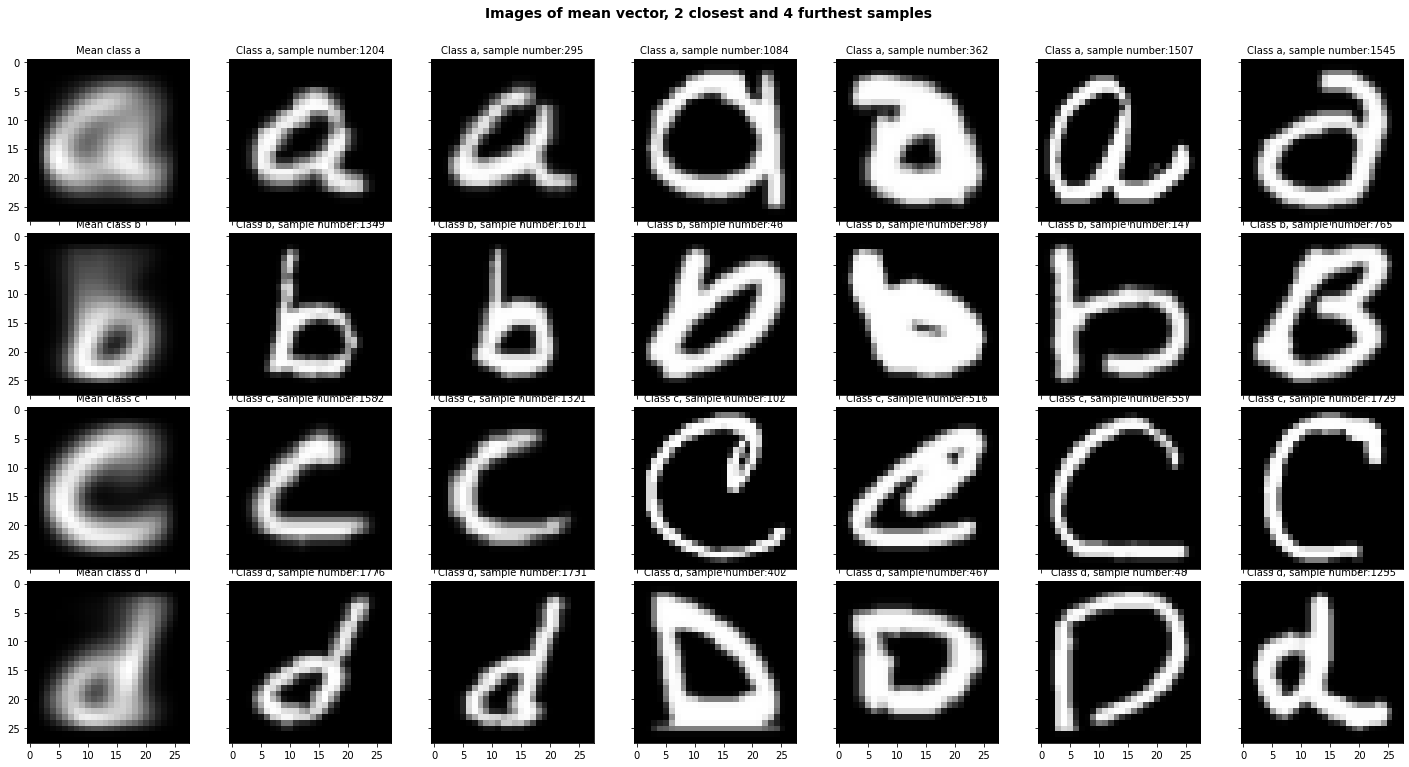

In [8]:
#(1)
# Display images of the mean vectors and the two closest and four furthest samples in a 4x7 grid
fig, ax = plt.subplots(4, 7, sharey=True, sharex=True, figsize=(20, 10))

for i, cls in enumerate(['a', 'b', 'c', 'd']):
    # Get samples of current class and find mean per class
    Xtrn_currentcls = Xtrn[Ytrn == i, :]
    mean_cls = np.mean(Xtrn_currentcls, axis=0)
    
    # Calculate the Euclidean distance for each sample of class from its mean
    # We do this by calculating the 2nd degree norm of the difference between each sample from the class mean
    dist = np.linalg.norm(Xtrn_currentcls - mean_cls, ord=2, axis=1)
    
    # Find the two closest samples for each class and sort them from 1st closest to 2nd closest
    closest_idx = np.argpartition(dist, 2)[0:2]
    # Find the four furthest samples and sort them from 4th furthest to 1st furthest
    furthest_idx = np.argsort(dist)[-4:][::-1]
    
    closest_1st = Xtrn_currentcls[closest_idx[0]].reshape(28, 28, order='F')   
    closest_2nd = Xtrn_currentcls[closest_idx[1]].reshape(28, 28, order='F')   
    furthest_4th = Xtrn_currentcls[furthest_idx[0]].reshape(28, 28, order='F')   
    furthest_3rd = Xtrn_currentcls[furthest_idx[1]].reshape(28, 28, order='F')
    furthest_2nd = Xtrn_currentcls[furthest_idx[2]].reshape(28, 28, order='F')
    furthest_1st = Xtrn_currentcls[furthest_idx[3]].reshape(28, 28, order='F')
    
    # Plot the grid of images: mean, 1st closest, 2nd closest, 4th furthest, 3rd furthest, 2nd furthest, 1st furthest
    ax[i, 0].imshow(mean_cls.reshape(28, 28, order='F'), cmap='gray')
    ax[i, 0].set_title('Mean class ' + cls, fontsize=10)
    ax[i, 0].set_xticks([0, 5, 10, 15, 20, 25])
    
    ax[i, 1].imshow(closest_1st, cmap='gray')
    ax[i, 1].set_title('Class ' + cls + ', sample number:' + str(closest_idx[0]), fontsize=10)
    
    ax[i, 2].imshow(closest_2nd, cmap='gray')
    ax[i, 2].set_title('Class ' + cls + ', sample number:' + str(closest_idx[1]), fontsize=10)
    
    ax[i, 3].imshow(furthest_4th, cmap='gray')
    ax[i, 3].set_title('Class ' + cls + ', sample number:' + str(furthest_idx[0]), fontsize=10)
    
    ax[i, 4].imshow(furthest_3rd, cmap='gray')
    ax[i, 4].set_title('Class ' + cls + ', sample number:' + str(furthest_idx[1]), fontsize=10)
    
    ax[i, 5].imshow(furthest_2nd, cmap='gray')
    ax[i, 5].set_title('Class ' + cls + ', sample number:' + str(furthest_idx[2]), fontsize=10)
    
    ax[i, 6].imshow(furthest_1st, cmap='gray')
    ax[i, 6].set_title('Class ' + cls + ', sample number:' + str(furthest_idx[3]), fontsize=10)
        

fig.suptitle('Images of mean vector, 2 closest and 4 furthest samples', y=1.05, 
             fontsize=14, fontweight='bold')
plt.subplots_adjust(top=1.1)
plt.tight_layout()
plt.show()

(2) 

Some possible issues when we use this dataset for classification that we see from the above plot include:

- From the images, it looks that the dataset includes letters that are uppercase. Specific examples of this issue are the 1st furthest from the mean in b (number 765) and the 4st 3rd and 2nd furthest from the mean in class d (sample numbers 402, 467 and 48). It shouldn't be a problem for some classes such as class c where the letter looks very similar in uppercase and lowercase but for other classes such as classes b and d, uppercase and lowercase letters have different features and we would therefore expect this to cause issues when learning features for classification.


- We also observe that there is large variation within classes in the dataset. This is evident in class b where the 1st closest (number 1349) and 4th furthest (number 46) samples seem to have very different shape characteristics. The 4th furthest has a long and inclined round element and a very small straight line, which create a not easily distinguishable 'b'. This also results in the mean of class b not representing sufficiently the letter. The upper part of the mean b class is very blurry and not sufficiently capturing the straight line at the left of the letter. Similarly, for class c the 4th furthest from the mean sample (number 102) has an uncommon feature at the top of the letter and the 3rd furthest from the mean sample (number 516) looks uncommon both in terms of additional features and also shape. These show that there is a variance in terms of the features found within classes which could provide difficulties in identifying class characteristics that can be used for classification.


- The graph also shows that there are similarities in samples between classes. For example, the 3rd furthest from the mean for class c (number 516) resembles the letter e. Similarly, the 3rd furthest from the mean for class d (number 467) resembles the letter o. In both examples the letters of this particular class could be misclassified for another class because of their pixel features. This shows that samples from a class can have features that are very similar to another class features, thus making the distinction between classes challenging in a classification task. 

\pagebreak

# ========== 1.4 ==========

Applying the Principal Component Analysis (PCA) to Xtrn_nm using sklearn.decomptision.PCA, answer the following questions:

1. Report the variances of the projected data for the first five principal components.
2. Plot a graph of the cumulative explained variance ratio as a function of the number of principal components, k, where 1 $\le$ K $\le$ 784.
3. Find the minimum number of principal components required to explain 50%, 60%, 70%, 80%, and 90% of the total variance, respectively.
4. Display the images of the first 10 principal components in a 2-by-5 grid, putting the image of first principal component on the top left corner, followed by the one of second component to the right. 
5. Based on the images you obtained above, discuss your findings briefly.


In [5]:
#(1)
# Apply PCA to Xtrn_nm using 5 components
pca_5d = PCA(n_components = 5)
Xtrn_nm_5d = pca_5d.fit_transform(Xtrn_nm)

# Display the variance explained by the projected data for each component
for i in np.arange(5):
    print('Variance of the projected data for component {} is: {:.3f}'.format(i+1, pca_5d.explained_variance_[i]))

Variance of the projected data for component 1 is: 6.506
Variance of the projected data for component 2 is: 4.324
Variance of the projected data for component 3 is: 3.511
Variance of the projected data for component 4 is: 3.111
Variance of the projected data for component 5 is: 2.933


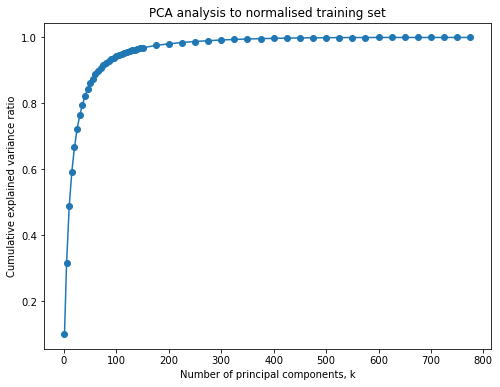

In [25]:
#(2)
# Find the cumulative explained variance ratio for different PCA components (k) ranging from 0 to 200
varratio_sum = []
k_list = np.concatenate((np.array([1]), np.arange(5, 150, 5), np.arange(150, 784, 25)))

for k in k_list:
    pca = PCA(n_components = k)
    Xtrn_nm_PCA = pca.fit_transform(Xtrn_nm)
    varratio_sum.append(pca.explained_variance_ratio_.sum())

# Plot a graph of the cumulative explained variance ratio as a function of the number of principal components k
plt.figure(figsize=(8, 6))
plt.scatter(k_list, varratio_sum)
plt.plot(k_list, varratio_sum)
plt.xlabel('Number of principal components, k')
plt.ylabel('Cumulative explained variance ratio')
plt.title('PCA analysis to normalised training set')
plt.show()

In [26]:
#(3)
# Find the minimum number of components required to explain 50%, 60%, 70%, 80% and 90% of total variance
varratio_ma = np.asarray(varratio_sum)
for i in np.arange(0.5, 1.0, 0.1):
    idx_i = np.argwhere(varratio_ma <= i)[-1]
    k_i = k_list[idx_i]
    print('Minimum number of components required to explain {:.0f}% of total variance: {}'.format(i*100, k_i[0]))

Minimum number of components required to explain 50% of total variance: 10
Minimum number of components required to explain 60% of total variance: 15
Minimum number of components required to explain 70% of total variance: 20
Minimum number of components required to explain 80% of total variance: 35
Minimum number of components required to explain 90% of total variance: 65


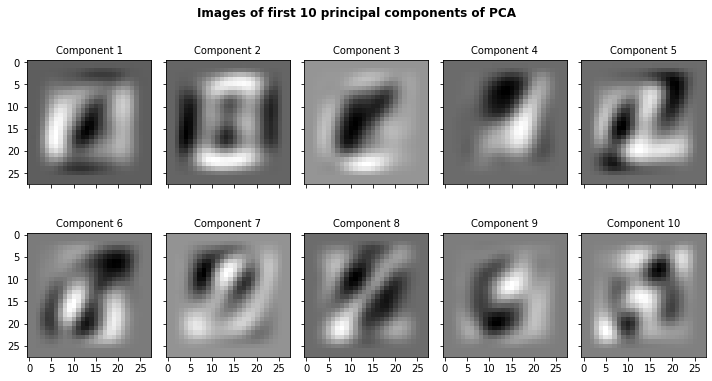

In [27]:
#(4)
# Find the first 10 principal components
pca_10d = PCA(n_components = 10)
pca_10d.fit(Xtrn_nm)
comp_10d = pca_10d.components_

# Display the images of the first 10 principal components in a 2x5 grid
fig, ax = plt.subplots(2, 5, sharey=True, sharex=True, figsize=(10,8))
for i in np.arange(10):
    component = comp_10d[i].reshape(28, 28, order='F')
    if i < 5:
        ax[0, i].imshow(component, cmap='gray')
        ax[0, i].set_title('Component {}'.format(i+1), fontsize=10)
        ax[0, i].set_xticks([0, 5, 10, 15, 20, 25])
        ax[0, i].set_yticks([0, 5, 10, 15, 20, 25])
    else:
        ax[1, i-5].imshow(component, cmap='gray')
        ax[1, i-5].set_title('Component {}'.format(i+1), fontsize=10)

plt.suptitle('Images of first 10 principal components of PCA', y=0.85, fontsize=12, fontweight='bold')
plt.subplots_adjust(top=1.4)
plt.tight_layout()
plt.show()

(5)

The first 10 PCA components capture the first 10 directions with the maximum variability in the data. In the images this is reflected in the letter features that are most important and are captured in the 10 first components. The principal components also capture the features that contribute most to variance in the data therefore these features will result in most differentiation in the data.

We see from the images that even though they are quite blurry, they seem to capture some prototypical elements of the letter classes. For example the 1st principal component has round feature elements that are typical in letters such as a and o. Similarly the 2nd principal component captures variability on the y-axis. It has long straight-like features resembling straight vertical and horizontal lines in letters. These are features that would be important in letter classes such as b, d, t and f. As we move from the 1st to the 10th principal component, less variance in the data is explained and more subtle letter features are captured. The images of the 6th to 10th principal components don't resemble whole letters but they seem to capture finer letter features. For example the 8th component shows a diagonal straight line feature which is typical in letters such as x and v.

Based on the graph in (2) and the results reported in (3) the 10 components should explain close to 50% of the total variance in the data. Based on the images this makes sense. The images of the first 10 components have some of the most general but also some finer letter characteristics. The 10 PCA components could therefore explain ~50% of the dataset's variance that lie along the dimension of each component.

\pagebreak

# ========== 1.5 ==========

We now consider applying dimensionality reduction with PCA to a sample and reconstructing the sample from the dimensionality-reduced sample.
Answer the following questions:

1. Describe this process using mathematical formulae.
2. For each class of 'a', 'b', 'c', and 'd', and for each number of principal components K=5,10,20,40,80,160,320, find the first sample in Xtrn_nm, apply the dimensionality reduction, reconstruct that sample, and display the image of that reconstructed sample in a 4-by-7 grid, where each row corresponds to a class and each column corresponds to a value of K. For each reconstructed sample, you should provide the root mean square error. Note that you should add Xmean to each reconstructed sample to display the corresponding image.
3. Explain your findings

(1)

Let's assume a dataset of n instances $X={x_i,..,x_n}$ with d the original number of dimensions. We want to apply principal component analysis (PCA) and represent the dataset in a new low dimensional space with m dimensions where $m<<d$. We then want to reconstruct the dataset from the dimensionality-reduced data.


- Before applying PCA we need to mean-normalise our dataset. In other words, center all points in the dataset to the origin by subtracting the mean $X_{nm} = X - X_{mean}$.
- We apply dimensionality reduction with PCA, which results in a set of eigenvectors $E={e_i,..e_m}$. Eigenvectors can also be referred to as principal components. The steps in PCA are:


  - We compute the covariance matrix for our dataset $\Sigma = \frac{1}{n} X\cdot X^T$. <br>
  - We find the eigenvectors $E={e_i,..,e_d}$ and the eigenvalues $\lambda_i,..\lambda_d$ of the covariance matrix $\Sigma$. <br>
  - We sort the eigenvectors by eigenvalue. <br>
  - We pick the top m eigenvectors that explain a certain level of total variance in our data. This is usually set as the top m eigenvectors that explain $90\%$ of total variance. <br>
  - We project our data in the new low dimensional space. This is the hyperplane defined by the first m eigenvectors (principal components). To do that we compute the dot product of vector X and the eigenvector of m components (transposed): <br>
    $X_{projected-m} = X \cdot E_m^{T}$.
    
    
- To reconstruct the data from the projected in low dimensions dataset we have to apply the inverse transformation of the PCA projection. To do that we compute the dot product of the projected vector and the vector of m principal components: 
    $X_{reconstructed} = X_{projected-m} \cdot E_m$. 
    This inverse transformation results in us representing all instances in the original dataset as a linear combination of m principal components.
    
    
- As a final step to reconstruct our dataset, we need to also add the mean $X_{mean}$ to every instance as this was removed initially when we normalised the dataset.

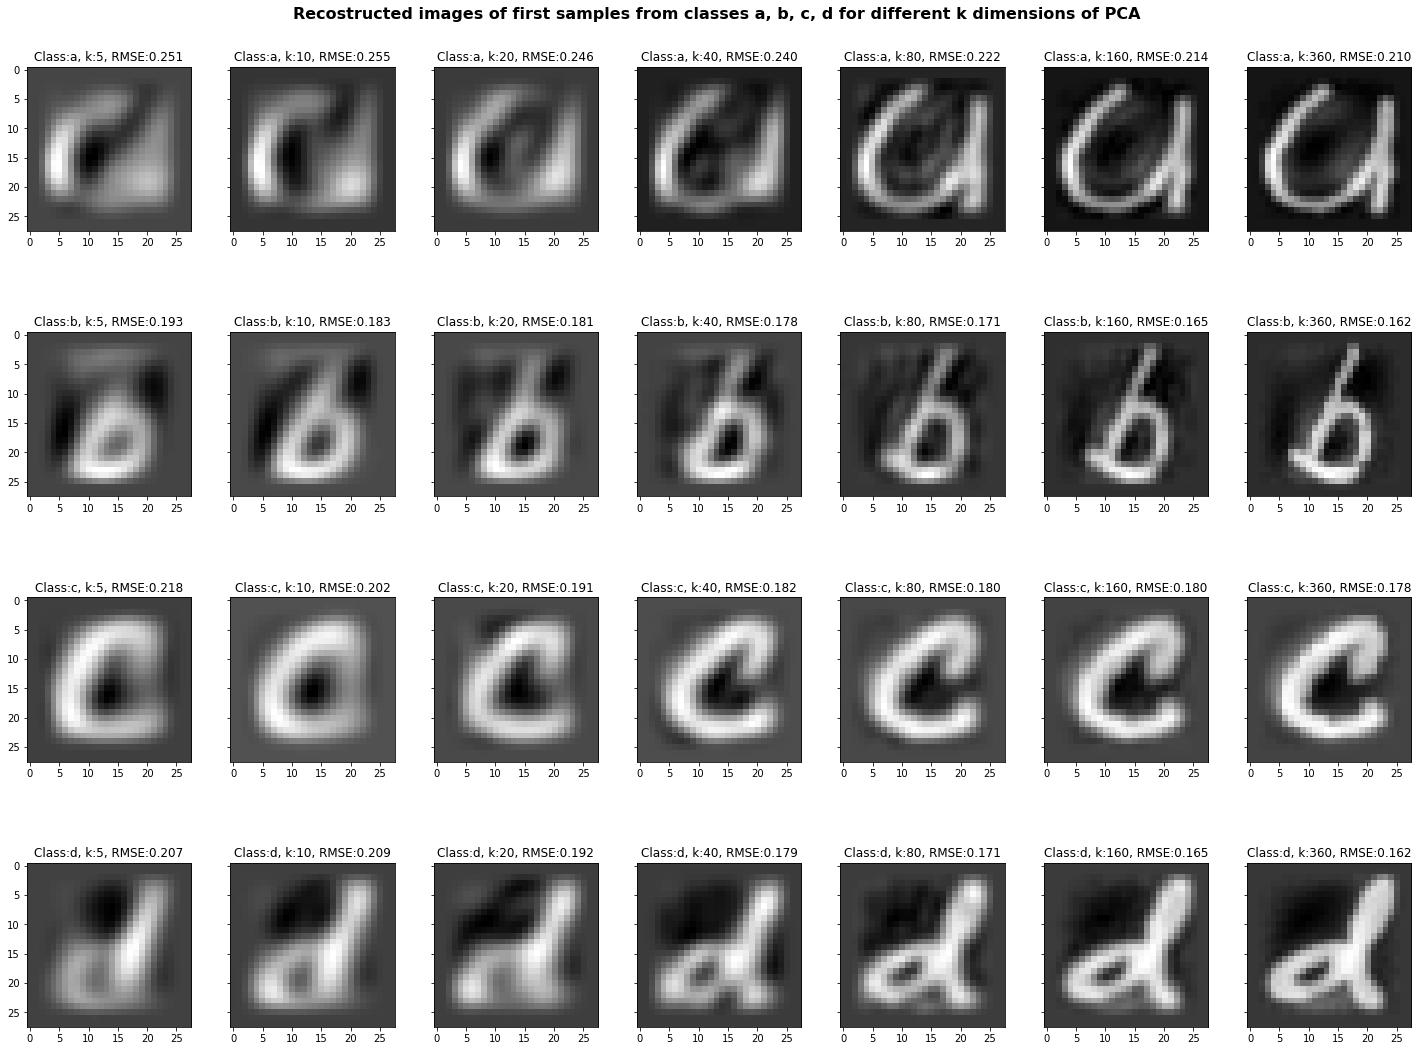

In [28]:
# (2)
k_list = [5, 10, 20, 40, 80, 160 ,360]
classes = ['a', 'b', 'c', 'd']

fig, ax = plt.subplots(4, 7, sharey=True, figsize=(20, 15))

for j, k in enumerate(k_list):
    # Apply dimensionality reduction PCA in Xtrn_nm for each k
    pca_kd = PCA(n_components = k)
    pca_kd.fit(Xtrn_nm)
    
    for i, cls in enumerate(classes):
        # Get the first sample in Xtrn_nm for each class
        Xtrn_nm_cls = Xtrn_nm[Ytrn == i, :]
        Xfirst = Xtrn_nm_cls[0,:].reshape(1, 784)
    
        # Get the mean of each class
        mean_cls = np.mean(Xtrn[Ytrn == i, :], axis=0)
        
        # Transform Xfirst using the fitted PCA
        Xfirst_kd = pca_kd.transform(Xfirst)
        
        # Reconstruct the sample from the dimensionality-reduced sample and calculate MSE
        Xfirst_rec = pca_kd.inverse_transform(Xfirst_kd) + mean_cls
        RMSE = mean_squared_error(Xfirst, Xfirst_rec, squared=False)
        
        # Display the image of the reconstructed sample
        ax[i, j].imshow(Xfirst_rec.reshape(28, 28, order='F'), cmap='gray')
        ax[i, j].set_title('Class:{}, k:{}, RMSE:{:.3f}'.format(cls, k, RMSE), fontsize=12)
        ax[i, j].set_xticks([0, 5, 10, 15, 20, 25])
        ax[i, j].set_yticks([0, 5, 10, 15, 20, 25])

plt.suptitle('Recostructed images of first samples from classes a, b, c, d for different k dimensions of PCA', 
             y=1., fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

(3)

We observe that the reconstruction of images from the dimensionality reduced sample is close to the original sample, although obviously not perfect since the projection to lower dimensions results in some loss of information. For lower values of k (such as for k=5 and 10) the reconstructed letters are quite blurry and in some cases (such as for letters a and b) don't resemble well at all the actual letter. As the number of principal components k increases, the reconstruction of samples improves and we get closer to the true letter. This is explained by the fact that for lower k values, the PCA components explain less of the total variance in the data. Based on the plot in Q1.4 (2), we would expect a PCA of k=5 components to explain almost 30% of total variance in the data whereas a PCA of k=360 components would explain more than 95% of the total variance in the data.

The same trend is also seen in the root mean squared error of each reconstructed sample. For k=5 the RMSE is higher in the reconstructed samples across all classes compared to the RMSE for k=360. A lower RMSE shows a better reconstructed sample that is closer to the original sample. Therefore, for higher k where more PCA components are used the recostruction is closer to the original samples and we have lower RMSE values in the reconstructed samples across all classes.

We also observe that some classes are represented better in lower dimensions compared to others. Classes c and d are represented relatively well even in 5 dimensions compared to classes a and b that resemble a lot less dinstinctively the actual leters. For k=5 in class a the RMSE is the highest at 0.251 compared to the RMSE for class b which is the lowest of the four classes for k=5 at 0.198. This shows that letter b is reconstructed closer to the original in 5 dimensions compared to letter a. This also shows that there is a lot of variance in the data and a PCA dimensionality reduction will work better for some classes compared to others. Finally, the images show that some letters display less variability than others so they are easier to reconstruct.

\pagebreak

# ========== 1.6 ==========

Applying k-means clustering to Xtrn with various values of k, answer (in brief) the following questions:

1. Show a graph of the sum of square error (SSE) as a function of k.
2. Discuss your findings. 

In [14]:
#(1)
# Apply k-means for different number of clusters k 
# and find the sum of square differences between datapoints and their closest cluster centre 
km_list = range(1, 20, 2)
SSE = []

for k in km_list:
    km = KMeans(n_clusters=k, random_state=1000)
    km.fit(Xtrn)
    SSE.append(km.inertia_)

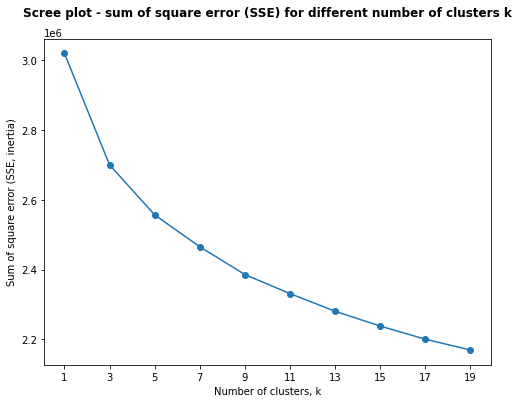

In [15]:
# Display a graph of SSE as a function of k
plt.figure(figsize=(8, 6))
plt.scatter(km_list, SSE)
plt.plot(km_list, SSE)
plt.xticks(km_list)
plt.xlabel('Number of clusters, k')
plt.ylabel('Sum of square error (SSE, inertia)')
plt.title('Scree plot - sum of square error (SSE) for different number of clusters k', y=1.05, fontweight='bold')
plt.show()

(2)

The sum of square error (SSE) is a clustering evaluation measure which is given by the squared sum of the distance of each point from its closest cluster center. A high value of SSE indicates high variance within a cluster whereas a low value of SSE indicates that points within a cluster don't vary considerably from the cluster centroid.

The graph of SSE as a function of the number of clusters k shows that as the number of clusters increases the aggregate intra-cluster distance drops. There is a sweet spot around k=7-9 clusters (elbow) after which point the rate of change of SSE drops and we get less improvement in SSE as we add more clusters. Based on this, we could assume that a number of clusters in this range 7-9 would be a suitable number for applying k-means clustering to the training set.

\pagebreak

# ========== 1.7 ==========

Apply hierarchical clustering with the Ward's linkage to all the samples of letter 'b' in Xtrn. Answer the following questions.

 1. Plot a dendrogram with scipy.cluster.hierarchy.dendrogram(), in which you specify orientation='right'.
 2. For each of the last four clusters to the root node, i.e, the four nodes from the root node on the dendrogram, find the number of samples (i.e. the number of leaf nodes) that belong to the cluster.
 3. For each of the last four clusters described above, display the image of the cluster centre and the image of the sample that is closest to the cluster centre. For each image sample, you should provide the sample number in the data set. Note that cluster centre is the mean vector of samples in that cluster. 
 4. Discuss your findings.

In [16]:
# (1)
# Add a new column in original dataset with the sample ids - this will be needed in 3
Xtrn_ids = np.asarray(np.arange(0, len(Xtrn)), dtype=int).reshape(len(Xtrn), 1)
Xtrn_withids = np.concatenate((Xtrn, Xtrn_ids), axis=1)

# Get all samples of letter 'b'
Xtrn_b_withids = Xtrn_withids[Ytrn == 1, :]
Xtrn_b = Xtrn[Ytrn == 1, :]

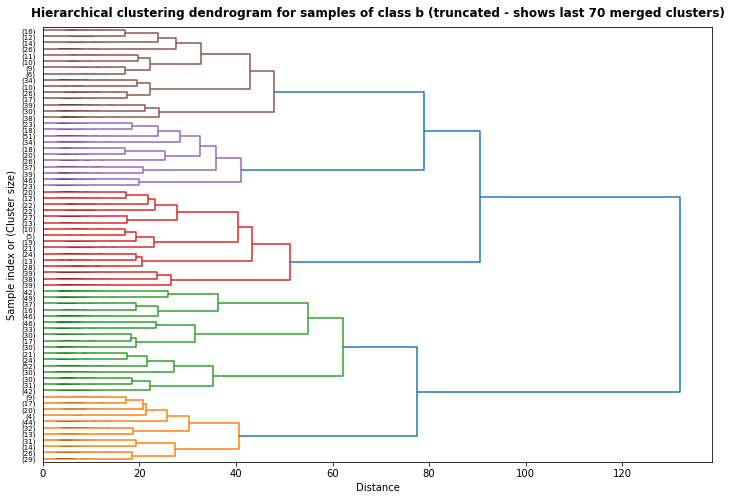

In [17]:
#(1)
# Apply hierarchical clustering with Ward's linkage
linked_Xtrn_b = linkage(Xtrn_b, method='ward')

# Plot a hierarchical clustering dendrogram
plt.figure(figsize=(12, 8))
dn = dendrogram(linked_Xtrn_b, orientation='right',
                show_leaf_counts=True,
                leaf_font_size=7, 
                truncate_mode='lastp', p=70,
                show_contracted=True,
                color_threshold=70)
plt.xlabel('Distance')
plt.ylabel('Sample index or (Cluster size)')
plt.title('Hierarchical clustering dendrogram for samples of class b (truncated - shows last 70 merged clusters)', 
         y=1.01, fontweight='bold')
plt.show()

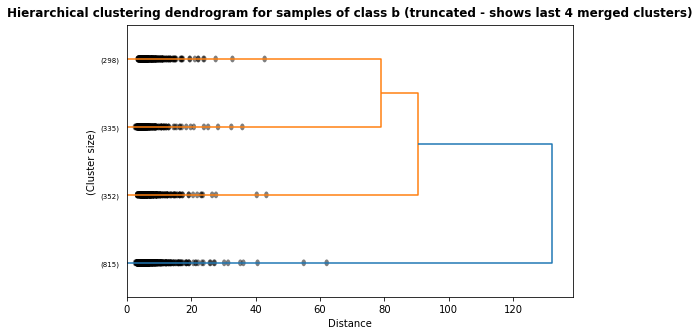

Number of samples that belong to the last 4 clusters from root node: [815 352 335 298]


In [18]:
#(2)
# Plot a hierarchical clustering dendrogram truncated to the last 4 clusters to the root node
plt.figure(figsize=(8, 5))
dn_last4 = dendrogram(linked_Xtrn_b, orientation='right',
                show_leaf_counts=True,
                leaf_font_size=7, 
                truncate_mode='lastp', p=4,
                show_contracted=True,
                get_leaves=True)
plt.xlabel('Distance')
plt.ylabel('(Cluster size)')
plt.title('Hierarchical clustering dendrogram for samples of class b (truncated - shows last 4 merged clusters)', 
         y=1.01, fontweight='bold')
plt.show()

dn4_clsizes = np.asarray([leaflabel.strip('()') for leaflabel in dn_last4['ivl']], dtype=int)
print('Number of samples that belong to the last 4 clusters from root node: {}'.format(dn4_clsizes))


In [19]:
# Another way to find the number of samples in each of the last 4 clusters from root node
# Get 4 flat clusters from the hierarchical clustering defined by linked_Xtrn_b
dn4_flat = fcluster(linked_Xtrn_b, t=4, criterion='maxclust')
dn4_leafs = np.unique(dn4_flat, return_counts=True)

for cluster in range(1, 5):
    print('Number of samples that belong to cluster {}: {}'.format(cluster, dn4_leafs[1][cluster - 1]))

Number of samples that belong to cluster 1: 815
Number of samples that belong to cluster 2: 352
Number of samples that belong to cluster 3: 335
Number of samples that belong to cluster 4: 298


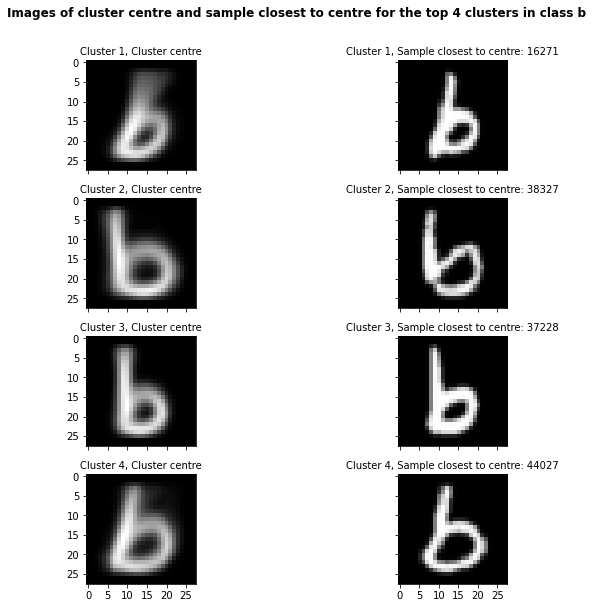

In [20]:
#(3)
# Create a 4x2 grid to present images of the cluster centre and the sample closest to the cluster centre of each cluster
fig, ax = plt.subplots(4, 2, sharey=True, sharex=True, figsize=(10, 8))

for cluster in range(1, 5):
    # Get samples of each cluster, find the centre (mean) 
    # and find the sample closest to the centre based on the Euclidean distance
    Xtrn_b_cl = Xtrn_b[dn4_flat == cluster]
    Xtrn_b_clwithid = Xtrn_b_withids[dn4_flat == cluster] # array with cluster samples and ids in original dataset
    mean_cl = np.mean(Xtrn_b_cl, axis=0)
    dist = np.linalg.norm(Xtrn_b_cl - mean_cl, ord=2, axis=1)
    closest_id_cl = np.argmin(dist)
    closest_cl = Xtrn_b_cl[closest_id_cl]
    sample_id = Xtrn_b_clwithid[closest_id_cl][-1]
    
    # Display images of cluster centre and sample closest to cluster centre
    ax[cluster-1, 0].imshow(mean_cl.reshape(28, 28, order='F'), cmap='gray')
    ax[cluster-1, 0].set_title('Cluster {}, Cluster centre'.format(cluster), fontsize=10)
    ax[cluster-1, 0].set_xticks([0, 5, 10, 15, 20, 25])
    ax[cluster-1, 0].set_yticks([0, 5, 10, 15, 20, 25])
    ax[cluster-1, 1].imshow(closest_cl.reshape(28, 28, order='F'), cmap='gray')
    ax[cluster-1, 1].set_title('Cluster {}, Sample closest to centre: {}'.format(cluster, int(sample_id)), fontsize=10)

fig.suptitle('Images of cluster centre and sample closest to centre for the top 4 clusters in class b', 
             y=1.05, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

(4)

Here we apply hierarchical agglomerative clustering which is a bottom-up approach for clustering, starting with singleton clusters and merging by distance based on Ward's method. We see that even when looking at just the 4 last clusters from the root node we get sufficient representation of the class features in each cluster. Also, we observe that each cluster captures a slightly different handwriting style.

The images of the cluster centres represent the mean of the samples in that cluster. They are more blurry and show more general and less distinct letter features. Since we are only 3 levels down from the root node, the cluster centres capture more coarse features of the letters. We also observe that the images of the samples closest to the cluster centre have more fine grained features but largely resemble the cluster centre images, particularly in terms of shape. For example in cluster 4 both the image of the cluster centre and the image of the sample closest have shapes that are leaning towards the right. Similarly in cluster 3 the images of the cluster centre and the sample closest to the centre show the letter upright and a straight line at the left . This shows that the clustering method has worked well in assigning samples to clusters and also the cluster centre appears to be a good representation of the average of samples in that cluster.

\pagebreak

# Part 2  Classification of handwritten characters

We use the same data set as the one in Part 1. We use Xtrn_nm for training and Xtst_nm for testing.


\pagebreak

# ========== 2.1 ==========

We consider applying multiclass logistic regression classification to the data set.
You should use sklearn.linear_model.LogisticRegression() with the default parameters.
Make sure that you use Xtrn_nm for training and Xtst_nm for testing.
Answer (in brief) the following questions:  

1. Explain how you can extend the original logistic regression for binary classification to multiclass logistic regression.
2. Carry out a classification experiment with multiclass logistic regression, and report the classification accuracy for the training set and test set.
3. Find the top five classes that were misclassified most in the test set. You should provide the class numbers, corresponding alphabet letters, and the numbers of misclassifications. 
4. For each class that you identified in 3 above, make a quick investigation and explain possible reasons for misclassification.

(1)

The original logistic regression for binary classification can be extended for multiclass classification using either the one-vs-rest approach or using the multinomial approach. Let's assume that we have k classes $C_i,..C_k$.


- For the one-vs-rest approach, the classification of a new instance x is based on deciding if x is of class $C_k$ or not of class $C_k$ (i.e. one of the other classes). Practically, this means building and training k binary logistic regression classifiers and then combining them for classification of a new instance x. A new instance x will be classified by comparing the class membership probability given by each classifier $p(y=C_k | x)$ and choosing the classifier that is most confident. <br>

- For the multinomial approach we don't need to build separate binary classifiers. This approach is based on first computing a score $s_k (x)$ for each class which is described as a linear combination of weight vectors: $s_k (x)= w_{k}^{T} \cdot x$. The scores are then combined using the _softmax_ function to estimate the probability of each class k given a new instance x: $p(y = C_k | x) = \frac{exp(s_k (x))}{\sum_{j=1}^{k} exp(s_j (x))}$.

In [7]:
#(2)
# Apply multiclass logistic regression
# sklearn's default parameters for multiclass classification implement the multinomial approach
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1000, multi_class='auto')
lr.fit(Xtrn_nm, Ytrn)

print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_nm, Ytrn)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_nm, Ytst)))

Classification accuracy on training set: 0.806
Classification accuracy on test set: 0.752


In [8]:
#(3)
# Get predicted classes using the test set and compute the confusion matrix
Ypred = lr.predict(Xtst_nm)
cm = confusion_matrix(Ytst, Ypred, labels=lr.classes_)

# Find number of misclassified instances for each class = total per row (total class samples) - diagonal (correctly classified)
# and sort by most classified
misclassified = np.sum(cm, axis=1) - np.diagonal(cm)
misclassified_id_sorted = np.argsort(misclassified)[::-1]

# Display the top 5 most misclassified classes and their corresponding letters
import string
letters = list(string.ascii_lowercase)

for i in range(0,5):
    label_id = lr.classes_[misclassified_id_sorted[i]]
    misclassifications = misclassified[misclassified_id_sorted[i]]
    print('Class {} that corresponds to letter {} had {} misclassifications.'.
          format(label_id, letters[label_id], misclassifications))

Class 6 that corresponds to letter g had 151 misclassifications.
Class 11 that corresponds to letter l had 130 misclassifications.
Class 16 that corresponds to letter q had 122 misclassifications.
Class 8 that corresponds to letter i had 121 misclassifications.
Class 19 that corresponds to letter t had 109 misclassifications.


In [9]:
# (4)
def plot_cm_as_array(cm, labels, title='Confusion matrix'):
    # Plots a confusion matrix as array of numbers
    fig, ax = plt.subplots(figsize=(15, 5))
    cm_tab = ax.table(cellText=cm, colLabels=labels, rowLabels=labels, 
                 cellLoc='center', loc='upper left', 
                 rowColours=['lightgray']*26, colColours=['lightgray']*26)
    cm_tab.set_fontsize(10)
    ax.set_title(title, fontweight='bold')
    ax.set_axis_off()

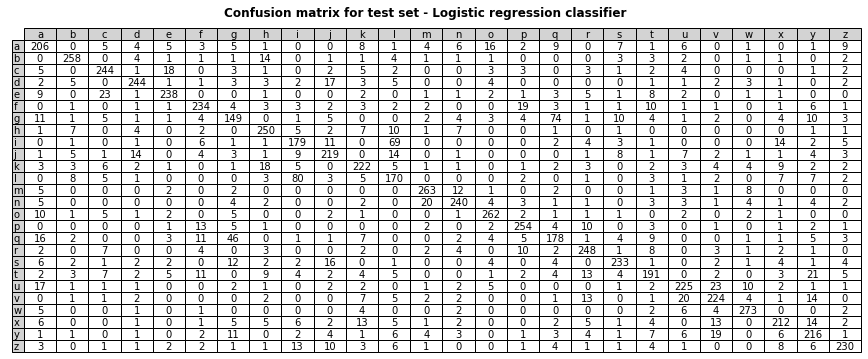

In [10]:
# Plot the confusion matrix of the logistic regression model, use alphabet letters as class labels
plot_cm_as_array(cm, letters, title='Confusion matrix for test set - Logistic regression classifier')

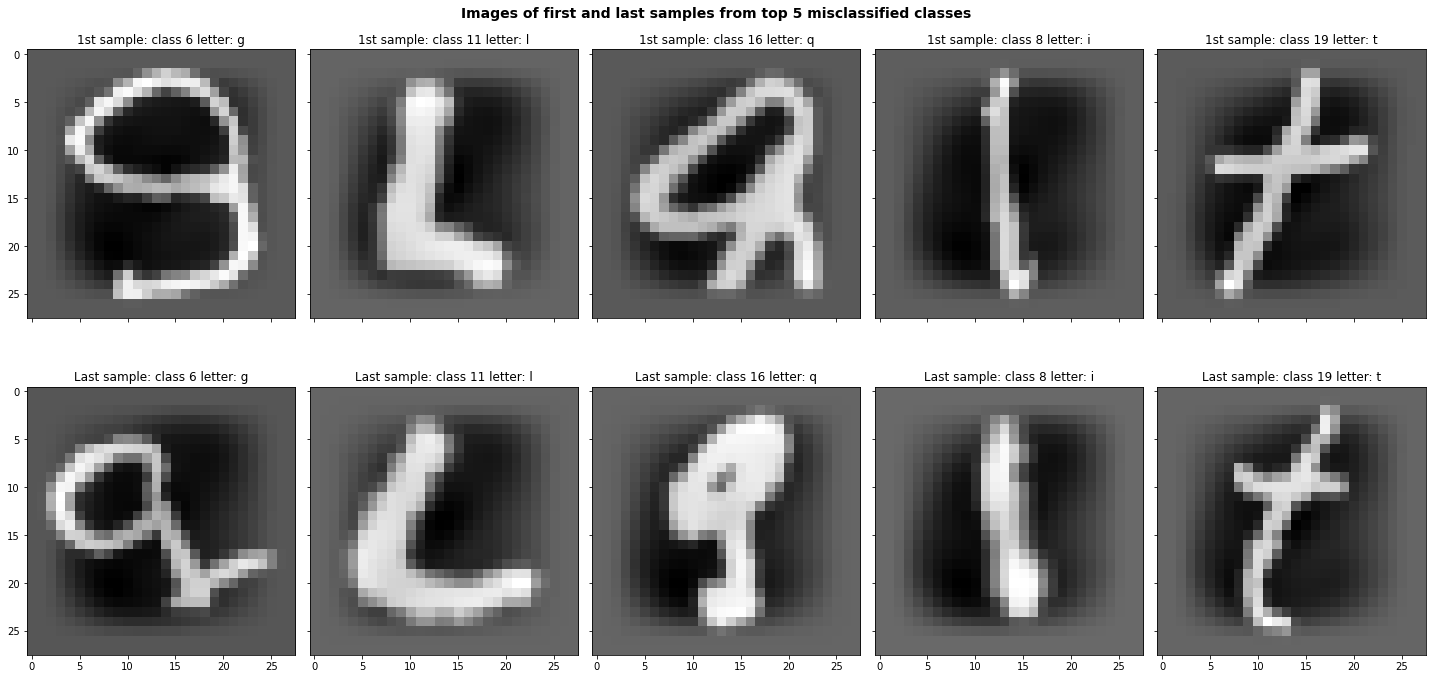

In [11]:
# (4)
# Get a list of the top 5 misclassified classes
topmisclas_classes = lr.classes_[misclassified_id_sorted[0:5]]

# Plot the images of the first and last samples from the top 5 misclassified classes
fig, ax = plt.subplots(2, 5, sharey=True, sharex=True, figsize=(20, 10))

for i, cls in enumerate(topmisclas_classes):
    # Get the first and last sample in Xtrn_nm for each of class
    Xtrn_nm_cls = Xtrn_nm[Ytrn == cls, :]
    Xfirst = Xtrn_nm_cls[0, :]
    Xlast = Xtrn_nm_cls[-1, :]
    
    ax[0, i].imshow(Xfirst.reshape(28, 28, order='F'), cmap='gray')
    ax[0, i].set_title('1st sample: class ' + str(cls) + ' letter: ' + letters[cls], fontsize=12)
    ax[0, i].set_xticks([0, 5, 10, 15, 20, 25])
    
    ax[1, i].imshow(Xlast.reshape(28, 28, order='F'), cmap='gray')
    ax[1, i].set_title('Last sample: class ' + str(cls) + ' letter: ' + letters[cls], fontsize=12)
    ax[1, i].set_xticks([0, 5, 10, 15, 20, 25])

plt.suptitle('Images of first and last samples from top 5 misclassified classes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

(4) 

Our top most misclassified classes correspond to letters: g, l, q, i and t. 

For letter g, we see from the confusion matrix that it has been classified correctly 149 times (diagonal) but it has had the most misclassifications - 151 times. It has mostly been misclassified as class q (74 misclassifications). It has also been misclassified as classes a, y and s but much fewer times. A possible reason for this could be because its features, particularly the round and line elements, could resemble similar features found in other classes. Intuitively this makes sense, as letters g and q have very similar features and depending on the handwritting style could easily look alike.

Similarly for the rest of the top misclassified classes, we observe from the confusion matrix:
- Letter l has mostly been misclassified as: i <br>
- Letter q has mostly been misclassified as: g <br>
- Letter i has mostly been misclassified as: l <br>
- Letter t has mostly been misclassified as: r, f <br>

This shows that the current logistic regression classifier has difficulty to distinguish between certain classes and particularly between: g, q and l, i. These classes get interchangeably misclassified as one another. A reason for that can be that these classes share similar features and variations in handwritting styles can make their features more difficult to differentiate. Letters l and i essentially differ only on the bullet used in letter i, so it makes sense that the classifier finds it difficult to separate them.

The plotted images of the first and last samples of the top 5 misclassified classes offer some explanations for the misclassifications although further investigation would be needed to understand the complete reasons for misclassification. The image of the last sample from class q looks very much like letter g. Also, both the first and last samples of class i look similar to the letter l.

\pagebreak

# ========== 2.2 =========

We now look into the effect of the number of training samples ($N$) on classification accuracy using multiclass logistic regression.
1. Carry out a classification experiment for $N$ = 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 46800, and plot the accuracy for the training set (Xtrn_nm) and test set (Xtst_nm) on the same graph. Note that you should always use the whole Xtst for testing irrespective of $N$.
2. Discuss your findings based on the graphs (results) you obtained, comparing the graphs for training and testing.

In [7]:
#(1)
N = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 46800]
trn_scores = []
tst_scores = []
for n in N:
    instances = n
    # Slice the original training set into a smaller set - pick the first n instances
    Xtrn_nm_new = Xtrn_nm[0:instances, :]
    Ytrn_new = Ytrn[0:instances]
    
    # Train a new logistic regression classifier with the new sliced set
    lr.fit(Xtrn_nm_new, Ytrn_new)
    Ypred_trn = lr.predict(Xtrn_nm)
    Ypred_tst = lr.predict(Xtst_nm)
    
    # Get the accuracy scores for training and test set
    trn_score = accuracy_score(Ytrn, Ypred_trn)
    trn_scores.append(trn_score)
    tst_score = accuracy_score(Ytst, Ypred_tst)
    tst_scores.append(tst_score)
    print('For N: {}, accuracy score for the training set: {:.3f}, accuracy score for the test set: {:.3f}'.
          format(n, trn_score, tst_score))

For N: 100, accuracy score for the training set: 0.351, accuracy score for the test set: 0.344
For N: 200, accuracy score for the training set: 0.462, accuracy score for the test set: 0.454
For N: 500, accuracy score for the training set: 0.594, accuracy score for the test set: 0.589
For N: 1000, accuracy score for the training set: 0.629, accuracy score for the test set: 0.621
For N: 2000, accuracy score for the training set: 0.673, accuracy score for the test set: 0.661
For N: 5000, accuracy score for the training set: 0.719, accuracy score for the test set: 0.694
For N: 10000, accuracy score for the training set: 0.750, accuracy score for the test set: 0.716
For N: 20000, accuracy score for the training set: 0.781, accuracy score for the test set: 0.735
For N: 30000, accuracy score for the training set: 0.793, accuracy score for the test set: 0.743
For N: 46800, accuracy score for the training set: 0.806, accuracy score for the test set: 0.752


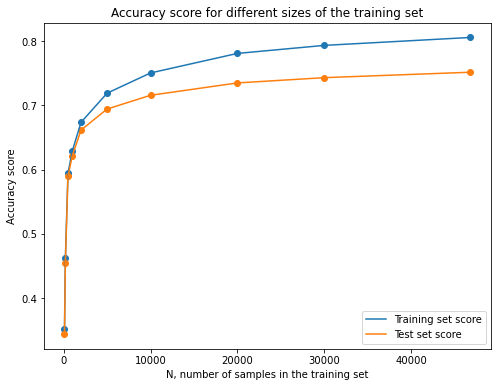

In [8]:
# Plot a graph with the accuracy score for the training set and test set as a function of N
plt.figure(figsize=(8, 6))
plt.scatter(N, trn_scores)
plt.plot(N, trn_scores)
plt.scatter(N, tst_scores)
plt.plot(N, tst_scores)
plt.xlabel('N, number of samples in the training set')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for different sizes of the training set')
plt.legend(['Training set score', 'Test set score'], loc='lower right')
plt.show()

(2) 

From the graph we observe that increasing the size of our training set increases the overall accuracy both in the training set and in the test set. As expected the classification accuracy is always higher in the training set than in the test set but they both follow a similar trend.

We observe that for small training set sizes of less than 5000, increasing the number of samples has a big impact on the model's accuracy. When the training set size reaches 10000 samples, the model's accuracy both for the training and test set level out and any increase in the number of instances doesn't result in significant improvement in accuracy. As we expect, this trend is less strong in the training set. The model's accuracy for the training set increases as we add more samples until it reaches its maximum at 0.806 when using the full dataset.

At 10000 samples, the accuracy for the training set is at 0.75 and for the test set is at 0.716. When using the full dataset for training, the accuracy for the training set reaches 0.806 and on the test set 0.752. This shows that even when using for training a dataset that is 20% of the full dataset, we can achieve an accuracy that is very close to the accuracy if we used the full dataset. This could help our task computationally as it will take a smaller amount of time to train a classifier model using only 20% of the original training set size. 

\pagebreak

# ========== 2.3 =========

We cosinder applying Support Vector Machines (SVMs) to the data set, using sklearn.svm.SVC().
For each of the two conditions shown below, carry out a classification experiment, report classification accuracy and confusion matrix (in numbers instead of in graphical representation such as heatmap) for the test set. You may share code between the two conditions. Make sure that you use Xtrn_nm for training and Xtst_nm for testing.

1. Condition A: SVM with a linear kernel and C=1
2. Condition B: SVM with a RBF kernel and C=1. 
3. Discuss your findings, comparing the results for the two conditions.

In [4]:
#(1)
from sklearn.svm import SVC

# Apply an SVM classifier with linear kernel
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(Xtrn_nm, Ytrn)
Ypred_linear = svc_linear.predict(Xtst_nm)
cm_linear = confusion_matrix(Ytst, Ypred_linear, labels=svc_linear.classes_)

print('Classification accuracy on test set for SVM with linear kernel: {:.3f}'.
     format(svc_linear.score(Xtst_nm, Ytst)))

Classification accuracy on test set for SVM with linear kernel: 0.792


In [5]:
def plot_cm_as_array(cm, labels, title='Confusion matrix'):
    # Plots a confusion matrix as array of numbers
    fig, ax = plt.subplots(figsize=(15, 5))
    cm_tab = ax.table(cellText=cm, colLabels=labels, rowLabels=labels, 
                 cellLoc='center', loc='upper left', 
                 rowColours=['lightgray']*26, colColours=['lightgray']*26)
    cm_tab.set_fontsize(10)
    ax.set_title(title, fontweight='bold')
    ax.set_axis_off()

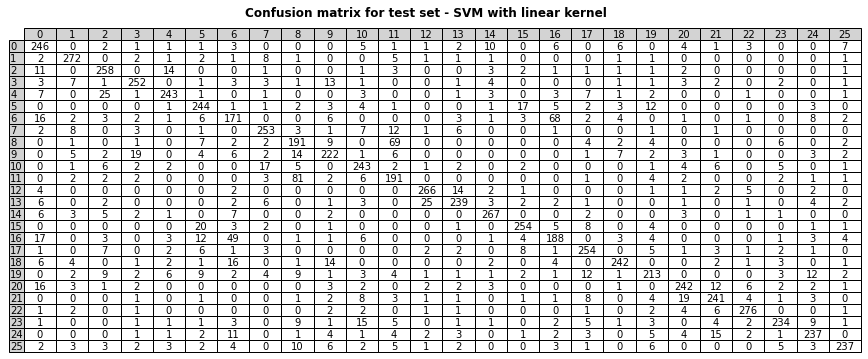

In [6]:
plot_cm_as_array(cm_linear, svc_linear.classes_, title='Confusion matrix for test set - SVM with linear kernel')

In [7]:
#(2)
# Apply an SVM classifier with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1)
svc_rbf.fit(Xtrn_nm, Ytrn)
Ypred_rbf = svc_rbf.predict(Xtst_nm)
cm_rbf = confusion_matrix(Ytst, Ypred_rbf, labels=svc_rbf.classes_)

print('Classification accuracy on test set for SVM with RBF kernel: {:.3f}'.
     format(svc_rbf.score(Xtst_nm, Ytst)))

Classification accuracy on test set for SVM with RBF kernel: 0.894


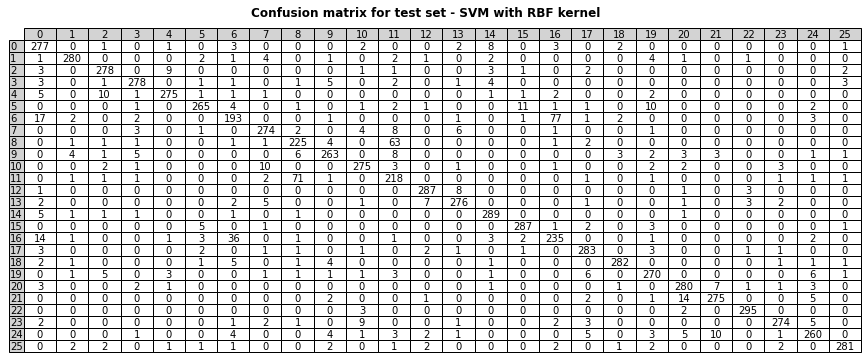

In [8]:
plot_cm_as_array(cm_rbf, svc_rbf.classes_, title='Confusion matrix for test set - SVM with RBF kernel')

(3)

Based on the classification accuracy and confusion matrix results on the test set, we see that the SVM model with Gaussian RBF kernel behaves slightly better than the SVM model with the linear kernel. The SVM model with RBF kernel achieves higher classification accuracy and also has fewer misclassifications. We see this by observing the numbers in the confusion matrix that are not on the diagonal (numbers on the diagonal represent the correcly classified instances of each class). This is somewhat expected, as the Gaussian RBF kernel is non-linear and therefore more flexible in terms of determining a decision surface that separates the data.

However, it is not possible to make any solid claims about which SVM model works better for this task before exploring the hyperparameter space and trying different parameters for both these kernels. For both kernels we need to explore the effect of the regularisation parameter C. C works as a trade-off parameter between correctly classifying training instances and the complexity of the decision boundary, essentially penalising the classifier for misclassified instances. For the Gaussian RBF kernel, it would also be sensible to expore the effect of the parameter gamma, the kernel coefficient. Gamma reflects the range of influence of each instance on the desicion boundary with a high gamma resulting in a wiggly decision boundary with boundary islands around specific points.

\pagebreak

# ========== 2.4 ==========

We used default parameters for the SVM in Question 2.2. We now want to tune the parameters by using cross-validation. 

1. Explain why we employ cross validation to determine the value of C.
2. To reduce the time for experiments, you pick up the first 400 training samples from each class (from 0 ('a') to 25 ('z') to create Xsmall, so that Xsmall contains 400\*26=1040 samples in total and its first 400 samples correspond to 'a' and the last 400 to 'z'. Accordingly, you create labels, Ysmall.
By using a 3-fold cross validation and Xsmall only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter C in the range $10^{-2}$ to $10^4$ (use 13 values spaced equally log space, where the logarithm base is 10). Set the kernel coefficient parameter gamma to 'auto' for this question. You should use sklearn.model_selection.cross_val_score.
Display the mean cross-validation classification accuracy for each C, and plot it against C by using a log-scale for the x-axis.
3. Report the highest obtained mean accuracy score and the value of C which yielded it.

(1)

Our initial dataset was split in training and test set, so we don't have a separate holdout dataset that we can use as validation to tune hyperparameters. If we use the training set to train the model and the test set to tune parameters, we will end up with a model that is overfitted on the test set. Also, we will have no way of evaluating how well our model is generalising on unseen data since our model will already be tuned to reduce the error on the test set. If we tune hyperparameters using the test set, we risk having a rather optimistic generalisation error that will not be representative of the true generalisation error. A validation set provides an unbiased evaluation of a model fit on the training set while tuning model parameters, however eventually the evaluation becomes more biased as the model gets configurated on the validation set.

In the absence of a separate validation set, we can employ cross-validation on the training set to tune the hyperparameter C. Cross-validation also has the advantage that we don't "waste" any training data in separate validation sets. In cross-validation, the training set is split in complementary subsets and in each turn the model is trained on a combination of subsets and validated on the remaining. One of the downsides of cross-validation is its high computational cost. It requires re-learning the model in each cross-validation therefore taking a longer time than using the training set for training and a separate dataset for validation.

In this case, we specifically use k-fold cross validation, which splits the training set randomly in k-folds and in each turn tests in 1-fold and trains in k-1 folds. We tune the parameter C by doing a grid search on 13 values and evaluating the performance measure (accuracy score) of the model using 3-fold cross-validation.

In [9]:
#(2)
# Create Xsmall and Ysmall by getting the first 400 samples from each class
for i in range(0, 26):
    Xtrn_cls = Xtrn_nm[Ytrn == i][0:400, :]
    Ytrn_cls = Ytrn[Ytrn == i][0:400]
    if i < 1:    
        Xsmall = Xtrn_cls
        Ysmall = Ytrn_cls
    else:
        Xsmall = np.concatenate((Xsmall, Xtrn_cls), axis=0)
        Ysmall = np.concatenate((Ysmall, Ytrn_cls), axis=0)

# Combine Xsmall and Ysmall to shuffle instances and then split again
XYsmall = np.concatenate((Xsmall, Ysmall.reshape(10400, 1)), axis=1)
np.random.shuffle(XYsmall)
Xsmall = XYsmall[:, :-1]
Ysmall = XYsmall[:, -1]

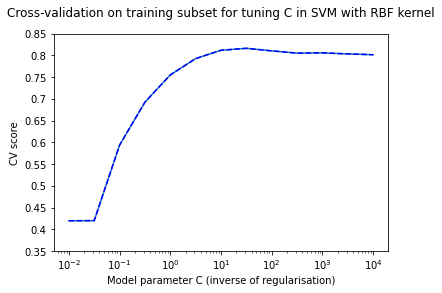

In [10]:
from sklearn.model_selection import cross_val_score

# Set up an SVM model with RBF kernel setting the kernel coefficient parameter gamma to auto
svc_rbf = SVC(kernel='rbf', gamma='auto')

# Use 3-fold cross validation with Xsmall and Ysmall 
# and record the mean cross-validation classification accuracy score for different C
C_s = np.logspace(-2, 4, base=10, num=13)
scores = []

for C in C_s:
    svc_rbf.C = C
    this_scores = cross_val_score(svc_rbf, Xsmall, Ysmall, cv=3, n_jobs=1)
    scores.append(np.mean(this_scores))
    
# Plot the mean cross-validation classification accuracy against C 
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Model parameter C (inverse of regularisation)')
plt.title('Cross-validation on training subset for tuning C in SVM with RBF kernel', y=1.05)
plt.show()

In [11]:
#(3)
# Find the max cross-validation accuracy score and the corresponding C value
maxscore = max(scores)
C_maxscore = C_s[scores == maxscore][0]
print('Max CV accuracy score achieved: {:.3f} for C: {:.3f}'.format(maxscore, C_maxscore))

Max CV accuracy score achieved: 0.816 for C: 31.623


The highest obtained accuracy using cross-validation on the reduced training subset was 0.816 for C=31.623. We observe from the plot that increasing the value of C improved the cross-validation accuracy until it leveled out for C=~10 and after that accuracy started to slowly drop. The parameter C in SVM is the regularisation parameter and is defined in sklearn's SVM model parameters as the inverse of regularisation strength. This means that as the value of C increases, the classifier becomes less tolerant to misclassified instances and can accept a smaller margin to improve classification accuracy. This also means that regularisation becomes less strong and the decision boundary more complex.

Since cross-validation was applied using only a small subset of the full dataset, the results are not directly applicable to the full dataset. We would expect a different value of C to maximize the accuracy when trained on the full training set and evaluated on the test set.

\pagebreak

# ========== 2.5 ==========

We now want to improve the classification accuracy for the multiclass logistic regression model from the one obtained in Question 2.1. Answer the following questions.
1. Discuss possible approaches, and decide the one you implement. Note that you should not use other classification models, but you should stick to the multiclass regression approach.
2. Implement the approach you have chosen, carry out a classification experiment, and report accuracy for the training set and test set.
3. Make a quick investigation to the result and report your findings.

(1)

The multiclass regression model in Q2.1 is trained on the full normalised training set (46800 samples, 784 features) and is built using the default parameters from sklearn. The default parameters include using a multinomial approach for multiclass classification and also applying l2 regularisation but keeping the default value for the regularisation parameter C to 1. This model achieves a classification accuracy on the test set of 0.752. We will refer to this as our baseline logistic regression model. Some possible options for improving accuracy are:

1. One option for improving classification accuracy is by tuning the hyperparameter C of the logistic regression model. This is the regularisation parameter, which works similarly as for SVM models by penalising (and thus reducing) misclassified instances at the expense of the simplicity of the decision boundary. In sklearn C is specified as the inverse of regularisation strength, so for small C the regularisation is strong and the classifier allows misclassified instances whereas for large C the classifier is heavily penalised for misclassifications and the decision boundary gets more complex. To tune this parameter we could employ cross-validation on the training set and apply grid search on a range of C values. Then by estimating the model's cross-validation classification accuracy for each value of C, we could evaluate and choose an appropriate value for C. We would need to apply cross-validation to the full training set (insteady of a subset as done in Q2.4 for time reasons) in order to properly tune the hyperparameter. The best value of C in this case is the one maximising cross-validation accuracy. We would then train the model on the full training set by setting C to this value and evaluate the model's performance on the test set. <br>

2. Another approach for improving the model's classification accuracy is by adding new non-linear features. Logistic regression is a linear classifier which works well for data that are clearly linearly separable. However, as the SVM-RBF model has shown in Q2.3 a non-linear model is more likely to work better in separating our data. One way to add new non-linear features is by applying a non-linear transformation on the features of our original input dataset. However, the original dataset has already a lot of features (784) and adding more features will increase complexity and make learning times computationally impossible. A better way to approach this is by first applying dimensionality reduction using PCA (principal component analysis). This will result in lower dimensional data represented using principal component features that are fewer compared to our original 784 features. Principal components also have the added benefit that they are much richer features compared to pixel features. One PCA component explains more variability in the data than one of the original 784 pixel features. After applying PCA, we can generate non-linear features from the PCA features and use the dataset with the non-linear PCA features to train the logistic regression model. We would expect that using non-linear PCA features to train the classifier would result in a more flexible and complex decision surface and thus improve the classification accuracy. <br>

3. Finally, a possible approach for improving the model's accuracy is a combination of the above. For example, we could apply PCA analysis, transform our dataset to include non-linear PCA features, then train the model using the new dataset and finally tune the hyperparameter C using cross-validation. <br>

We will implement the 3rd option, applying a PCA analysis to the original normalised dataset (training and test) and then using the new dataset with PCA features to generate 2nd degree polynomial PCA features. We will do this using sklearn's PolynomialFeatures method on the transformed PCA features. Finally, we will use the training set with the PCA 2nd degree polynomial features to train the logistic regression model and evaluate the model's accuracy on both the training and test set. <br>

We will test the model's classification accuracy on the training and test set for different number of principal components k=[5, 10, 20, 40, 60, 80]. We will also compare the model's accuracy when trained with linear PCA features and when trained with 2nd degree polynomial PCA features.

In [5]:
#(2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

k_pca = [5, 10, 20, 40, 60, 80]
scorestrn_pca = []
scorestrn_pcapoly = []
scorestst_pca = []
scorestst_pcapoly = []

for k in k_pca:
    # Apply PCA to Xtrn_nm and Xtst_nm using k components
    pca = PCA(n_components = k)
    Xtrn_nm_pca = pca.fit_transform(Xtrn_nm)
    Xtst_nm_pca = pca.transform(Xtst_nm)
    
    # Generate and transform data to 2nd degree polynomial features
    poly = PolynomialFeatures(degree=2)
    Xtrn_nm_pcapoly = poly.fit_transform(Xtrn_nm_pca)
    Xtst_nm_pcapoly = poly.transform(Xtst_nm_pca)
    
    # Apply multiclass logistic regression to the linear PCA and the 2nd degree polynomial PCA data
    lr_pca = LogisticRegression(random_state=1000)
    lr_poly = LogisticRegression(random_state=1000)
    lr_pca.fit(Xtrn_nm_pca, Ytrn)
    lr_poly.fit(Xtrn_nm_pcapoly, Ytrn)
    
    # Get predictions on class labels and accuracy scores on the training and test set
    Ytrnpred_pca = lr_pca.predict(Xtrn_nm_pca)
    Ytrnpred_pcapoly = lr_poly.predict(Xtrn_nm_pcapoly)
    Ytstpred_pca = lr_pca.predict(Xtst_nm_pca)
    Ytstpred_pcapoly = lr_poly.predict(Xtst_nm_pcapoly)
    
    thisscoretrn_pca = accuracy_score(Ytrn, Ytrnpred_pca)
    thisscoretrn_pcapoly = accuracy_score(Ytrn, Ytrnpred_pcapoly)
    thisscoretst_pca = accuracy_score(Ytst, Ytstpred_pca)
    thisscoretst_pcapoly = accuracy_score(Ytst, Ytstpred_pcapoly)
    
    scorestrn_pca.append(thisscoretrn_pca)
    scorestrn_pcapoly.append(thisscoretrn_pcapoly)    
    scorestst_pca.append(thisscoretst_pca)
    scorestst_pcapoly.append(thisscoretst_pcapoly)

    print('Classification accuracy on training set for {} PCA - linear features: {:.3f}'.
          format(k, thisscoretrn_pca))
    print('Classification accuracy on training set for {} PCA - 2nd degree polynomial features: {:.3f}'.
          format(k, thisscoretrn_pcapoly))
    print('----------------------------------------------------\n')   
    print('Classification accuracy on test set for {} PCA - linear features: {:.3f}'.
          format(k, thisscoretst_pca))
    print('Classification accuracy on test set for {} PCA - 2nd degree polynomial features: {:.3f}'.
          format(k, thisscoretst_pcapoly))
    print('----------------------------------------------------\n')

Classification accuracy on training set for 5 PCA - linear features: 0.397
Classification accuracy on training set for 5 PCA - 2nd degree polynomial features: 0.496
----------------------------------------------------

Classification accuracy on test set for 5 PCA - linear features: 0.388
Classification accuracy on test set for 5 PCA - 2nd degree polynomial features: 0.488
----------------------------------------------------

Classification accuracy on training set for 10 PCA - linear features: 0.578
Classification accuracy on training set for 10 PCA - 2nd degree polynomial features: 0.788
----------------------------------------------------

Classification accuracy on test set for 10 PCA - linear features: 0.570
Classification accuracy on test set for 10 PCA - 2nd degree polynomial features: 0.776
----------------------------------------------------

Classification accuracy on training set for 20 PCA - linear features: 0.694
Classification accuracy on training set for 20 PCA - 2nd deg

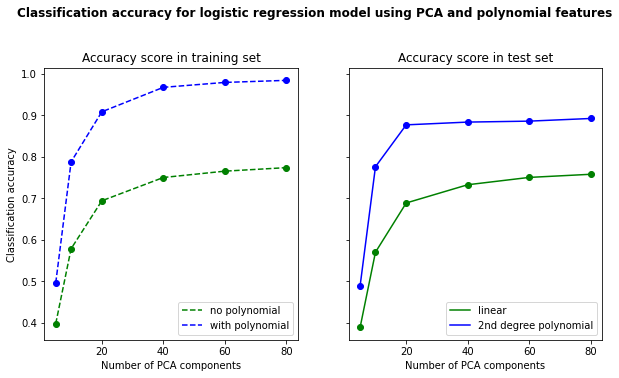

In [6]:
# (3)
# Plot a graph showing the classification accuracy as a function of the number of PCA components 
# with and without polynomial features
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax[0].plot(k_pca, scorestrn_pca, 'g--')
ax[0].scatter(k_pca, scorestrn_pca, c='g')
ax[0].plot(k_pca, scorestrn_pcapoly, 'b--')
ax[0].scatter(k_pca, scorestrn_pcapoly, c='b')
ax[0].set_xlabel('Number of PCA components')
ax[0].set_ylabel('Classification accuracy')
ax[0].legend(['no polynomial', 'with polynomial'], loc=4)
ax[0].set_title('Accuracy score in training set')

ax[1].plot(k_pca, scorestst_pca, 'g-')
ax[1].scatter(k_pca, scorestst_pca, c='g')
ax[1].plot(k_pca, scorestst_pcapoly, 'b-')
ax[1].scatter(k_pca, scorestst_pcapoly, c='b')
ax[1].set_xlabel('Number of PCA components')
ax[1].legend(['linear', '2nd degree polynomial'], loc=4)
ax[1].set_title('Accuracy score in test set')

plt.suptitle('Classification accuracy for logistic regression model using PCA and polynomial features', 
             y=1.05, fontweight='bold')
plt.show()

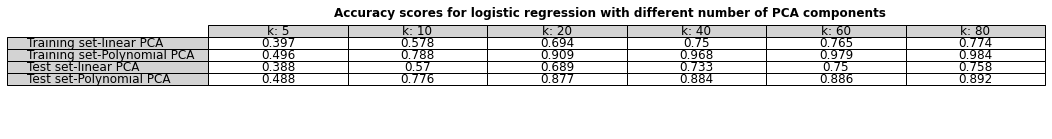

In [13]:
# Store accuracy score results in a dataframe
scores_df = pd.DataFrame(data = [[round(c, 3) for c in scorestrn_pca], 
                              [round(c, 3) for c in scorestrn_pcapoly], 
                              [round(c, 3) for c in scorestst_pca], 
                              [round(c, 3) for c in scorestst_pcapoly]], 
                        index = ['Training set-linear PCA', 'Training set-Polynomial PCA', 
                                'Test set-linear PCA', 'Test set-Polynomial PCA'], 
                        columns = ['k: ' + str(k) for k in k_pca])

# Display results for accuracy scores in the training and test set in a table
fig, ax = plt.subplots(figsize=(15, 2))
scores_tab = ax.table(cellText=scores_df.values, rowLabels=scores_df.index, colLabels=scores_df.columns, 
                          cellLoc='center', loc='upper left', 
                          rowColours=['lightgray']*4, colColours=['lightgray']*len(k_pca))
ax.set_title('Accuracy scores for logistic regression with different number of PCA components', fontweight='bold')
scores_tab.set_fontsize(12)
ax.set_axis_off()

(3) 

We make the following observations from the results of our classification experiment:

-  We see that applying PCA analysis and using the PCA features dataset (with fewer dimensions than the original dataset) can achieve similar accuracy scores as our baseline. The logistic regression model with 60 PCA linear features achieves a similar accuracy on the test set as our baseline logistic regression model. This shows that by using fewer but nonetheless richer features can provide similar results in terms of accuracy while also providing the benefit of shorter learning times.<br>

- Comparing again against the baseline, we observe that the addition of 2nd degree polynomial PCA features improves the model's accuracy significantly. For 10 PCA polynomial features the logistic regression classifier already shows better results in terms of accuracy compared to the baseline. For 20 PCA polynomial features we reach 0.877 accuracy which is an ~17% improvement from the baseline. For larger numbers of PCA components, the accuracy score on the test set levels out and by adding more PCA components we only achieve an incremental improvement in accuracy. This indicates a sweet spot for ~20 PCA 2nd degree polynomial features where the logistic regression classifier achieves an accuracy of 0.877 on the set.<br>

- It is also clear from the graphs that the accuracy on both the traiing and test set is far better when using 2nd degree polynomial features than simply linear PCA features. This indicates that our data are non-linearly separable and using polynomial features to train a logistic regression classifier achieves better results in separating classes and classifying new instances.<br>

- Comparing the accuracy between the training and test set, we see that both show similar differences in accuracy when using linear and polynomial features. They also both show similar trends of improvement in accuracy for small numbers of k as we add more PCA components. However, accuracy on the test set levels out after a point whereas the accuracy on the training set increases constantly and especially for polynomial features. This is expected as the model will tend to overfit the training data with polynomial features. For 80 PCA polynomial features, accuracy on the training set reaches 0.984 which is very close to a perfect fit, however we don't see the same trend in the accuracy in the training set for linear PCA features.<br>

- To avoid overfitting on the training set, we could try tuning the regularisation parameter C. We would expect this to reduce the accuracy on the training set as it controls overfitting. However, this would likely improve accuracy on the test set as the model gets less complex and variance is reduced.<br>


\pagebreak

# Part 3  Classification of sequential data

### Human Activity Recognition data set (UniMiB SHAR)

The aim of this task is to predict types of activities of daily living (ADL) from acceleration samples acquired with a smartphone. We use a subset of [UniMiB SHAR Activities](http://www.sal.disco.unimib.it/technologies/unimib-shar/).
Activities of 30 people (subjects) were recorded at a sampling frequency of 50Hz and parameterised as a fixed-length sequence of (x,y,z)-accelaration vectors. Each sample is represented as a vector of 453 elements, whose original shape was 151-by-3.
There are nine activities:'StandingUpFS', 'StandingUpFL', 'Walking', 'Running', 'GoingUpS', 'Jumping', 'GoingDownS', 'LyingDownFS', 'SittingDown'.

For training and evaluation, we employ leave-one-subject-out cross-validation, in which, for each of 30 subjects, the data of the remaining 29 subjects is used for training and the data of the left-out subject is used for validation (testing).
We will mainly employ ***macro F1 score*** as the evaluation measure. Note that we can not expect good F1 scores for test data in this question. Scores of around 0.4 are even possible.

### Loading data: ###

Upload the data set files, 'adl_data.mat', 'adl_labels.mat', 'adl_train_idxssubjective_folds.mat', and 'adl_test_idxssubjective_folds.mat' to your environment, and run the following cell.

In [2]:
# Load the data set and apply some changes
from helpers import *
X, Y, train_idx, test_idx = load_UniMiB_SHAR_ADL()
# Change labels and indices for Python (zero-indexing)
Y = Y-1
train_idx = train_idx - 1
test_idx = test_idx - 1


- X: whole data (shape=(7579,453))
- Y: labels for X (shape=(7579,3)).The first columns is the type of activity, second column is the subject number, and third column is the gender of the subject.
- train_idx: list of training data indices for the leave-one-subject-out. For subject k, train_idx\[k\] gives indices to X that should be used for training
- test_idx:  list of test data indices for the leave-one-subject-out. For subject k, test_idx\[k\] gives indices to X that should be used for testing

In [3]:
# Check that loading of datasets was correct
print('Whole dataset X: {}'.format(X.shape))
print('Labels Y : {}'.format(Y.shape))
print('List of training data indices for CV: {}'.format(train_idx.shape))
print('List of test data indices for CV: {}'.format(test_idx.shape))

Whole dataset X: (7579, 453)
Labels Y : (7579, 3)
List of training data indices for CV: (30, 1)
List of test data indices for CV: (30, 1)


\pagebreak

# ========== 3.1 ==========

Answer the following questions: 
1. Using a barplot, plot the frequency of each activity in the whole data set.
2. Explain your findings and discuss possible issues with the data set when we use it for activity classification tasks.

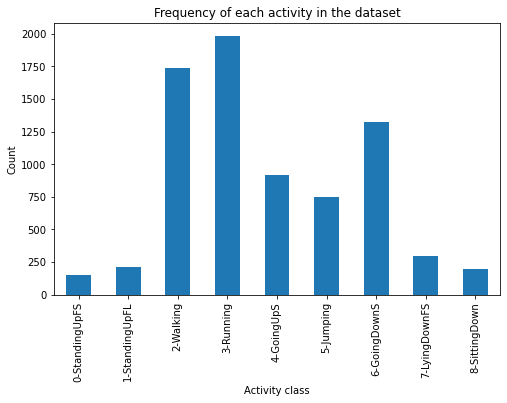

In [4]:
#(1)
activities = ['StandingUpFS', 'StandingUpFL', 'Walking', 'Running', 'GoingUpS', 'Jumping', 'GoingDownS', 'LyingDownFS', 'SittingDown']

# Create a dataframe with the labels Y and find the frequency of each activity in the dataset
# convert the activity type column from numeric to categorical
Ydf = pd.DataFrame(Y, columns=['ActivityType', 'SubjectNumber', 'SubjectGender'])
Yact_counts = Ydf['ActivityType'].astype('category').value_counts(sort=False) 

# Plot the distribution of activity categories
fig, ax = plt.subplots(figsize=(8,5))
ax = Yact_counts.plot(kind='bar', title='Frequency of each activity in the dataset')
labels = [int(ticklabel.get_text()) for ticklabel in ax.get_xticklabels()] # Get the current labels
ax.set_xticklabels([str(l) + '-' + activities[l] for l in labels])
ax.set_xlabel('Activity class')
ax.set_ylabel('Count')
plt.show()

In [5]:
# Display the number of counts for each unique activity type
act_counts = np.unique(Y[:,0], return_counts=True)
for i in range(9):
    act_count = act_counts[1][act_counts[0] == i]
    print('Activity {}-{} has frequency: {}'.
          format(i, activities[i], act_count[0]))

Activity 0-StandingUpFS has frequency: 153
Activity 1-StandingUpFL has frequency: 216
Activity 2-Walking has frequency: 1738
Activity 3-Running has frequency: 1985
Activity 4-GoingUpS has frequency: 921
Activity 5-Jumping has frequency: 746
Activity 6-GoingDownS has frequency: 1324
Activity 7-LyingDownFS has frequency: 296
Activity 8-SittingDown has frequency: 200


(2)

From the barplot we see that activity categories are not distributed equally across the dataset. Activities 2-Walking, 3-Running and 6-GoingDownS are more prominent in the dataset compared to the other activities. These three classes cover almost 67% of the activity categories in the whole dataset. Activities 0-StandingUpFS, 1-StandingUpFL, 7-LyingDownFS and 8-SittingDown have very low counts in the dataset, each representing 4% or less of the total samples. 

This imbalance in activity categories could create issues if we use this dataset for classification of activities. Activities 2, 3 and 6 show up in higher frequency in the dataset and so training a classifier with this dataset could become more biased towards these activity classes. Similarly, since there are not many samples from activity categories 0, 1, 7 and 8 the classifier will be less able to learn characteristics from these classes making them more difficult to be distinguished and more likely to be misclassified.

\pagebreak

# ========== Part 3.2 ==========

Answer the following questions: 
1. Carry out an experiment with k-nearest neighbours classification with the Euclidean distance measure for k = 1, 2, 3, 5, 7, 10, display *macro F1 scores* for training and testing, and plot the scores on a single figure. Make sure that you employ leave-one-subject-out cross validation.
2. Discuss your findings.

In [6]:
#(1)
# Compute the distance matrix for X by calculate the pairwise Euclidean distances for all samples
from sklearn.metrics.pairwise import euclidean_distances
Xdist = euclidean_distances(X, X)

# Get true labels for the activity classification task from Y
Yact = Y[:,0]

In [7]:
# Apply kNN classification with the Euclidean distance measure for different k and calculate the macro F1 score
# For each k (number of nearest neighbours) use leave-one-subject-out cross validation
# For kNN use the precomputed distance matrix

f1_trn_scores = []
f1_tst_scores = []
k_knnlist = [1, 2, 3, 5, 7, 10]
k_subjects = np.arange(0, 30)

for k_knn in k_knnlist:
    # Initialise lists for true and predicted labels - these will be used to compute the macro-F1 score
    Ytrn_true = []
    Ytrn_pred = []
    Ytst_true = []
    Ytst_pred = []
    
    # Apply leave-one-subject-out cross validation
    for k in k_subjects:
        
        # For subject k find the training and testing indices
        trn_ids = train_idx[k][0].reshape(train_idx[k][0].shape[0],)
        tst_ids = test_idx[k][0].reshape(test_idx[k][0].shape[0],)
        
        # Split the distance matrix Xdist and the labels Yact in training and test sets
        Xdist_trn, Xdist_tst = Xdist[trn_ids][:, trn_ids], Xdist[tst_ids][:, trn_ids]
        Ytrn, Ytst = Yact[trn_ids], Yact[tst_ids]
        
        # Fit a kNN classifier using the precomputed distance matrix and predict labels on the training and test set
        kneigh = KNeighborsClassifier(n_neighbors=k_knn, metric='precomputed')
        kneigh.fit(Xdist_trn, Ytrn)
        Ytrn_thispred = kneigh.predict(Xdist_trn)
        Ytst_thispred = kneigh.predict(Xdist_tst)

        # Append to our list of predicted and true labels
        Ytrn_true.append(Ytrn)
        Ytrn_pred.append(Ytrn_thispred)
        Ytst_true.append(Ytst)
        Ytst_pred.append(Ytst_thispred)
    
    # Complete array with predicted and true labels from all CV sets
    Ytrn_true = np.concatenate(Ytrn_true, axis=0)
    Ytrn_pred = np.concatenate(Ytrn_pred, axis=0)
    Ytst_true = np.concatenate(Ytst_true, axis=0)
    Ytst_pred = np.concatenate(Ytst_pred, axis=0)
    
    # Calculate and print macro F1 scores for training and test set
    f1_trn_thisscore = f1_score(Ytrn_true, Ytrn_pred, average='macro')
    f1_tst_thisscore = f1_score(Ytst_true, Ytst_pred, average='macro')
    f1_trn_scores.append(f1_trn_thisscore)
    f1_tst_scores.append(f1_tst_thisscore)
    print('For k {} nearest neighbours, macro F1 score in training test: {:.3f}'.format(k_knn, f1_trn_thisscore))
    print('For k {} nearest neighbours, macro F1 score in test set: {:.3f}'.format(k_knn, f1_tst_thisscore))
    print('---------------------------------------------------------\n')

For k 1 nearest neighbours, macro F1 score in training test: 1.000
For k 1 nearest neighbours, macro F1 score in test set: 0.647
---------------------------------------------------------

For k 2 nearest neighbours, macro F1 score in training test: 0.942
For k 2 nearest neighbours, macro F1 score in test set: 0.605
---------------------------------------------------------

For k 3 nearest neighbours, macro F1 score in training test: 0.936
For k 3 nearest neighbours, macro F1 score in test set: 0.615
---------------------------------------------------------

For k 5 nearest neighbours, macro F1 score in training test: 0.887
For k 5 nearest neighbours, macro F1 score in test set: 0.597
---------------------------------------------------------

For k 7 nearest neighbours, macro F1 score in training test: 0.856
For k 7 nearest neighbours, macro F1 score in test set: 0.580
---------------------------------------------------------

For k 10 nearest neighbours, macro F1 score in training test

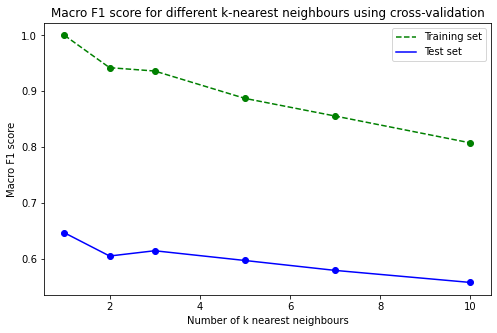

In [8]:
# Plot the macro F1 scores for training and test set for the different k nearest neigbours
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_knnlist, f1_trn_scores, 'g--')
ax.scatter(k_knnlist, f1_trn_scores, c='g')
ax.plot(k_knnlist, f1_tst_scores, 'b-')
ax.scatter(k_knnlist, f1_tst_scores, c='b')
ax.set_xlabel('Number of k nearest neighbours')
ax.set_ylabel('Macro F1 score')
ax.legend(['Training set', 'Test set'], loc='best')
ax.set_title('Macro F1 score for different k-nearest neighbours using cross-validation')
plt.show()

(2)

The macro F1 score results for the training and test set show that the k-nn classifier achieves maximum classification accuracy on the test set for k=1 nearest neighbours. For a higher number of nearest neighbours the macro-F1 score drops thus suggesting a worse classifier performance. For k=1 the macro-F1 score is 0.647 and for k=10 the macro-F1 score is 0.558 which is a 13% drop. 

The F1 score is a measure for evaluating classification accuracy and is defined as the harmonic mean of precision and recall score. A high F1 score shows that the model has low false negatives and false positives. An F1 score of 1 is an indication of perfect precision and recall whereas an F1 score of 0 suggests that the model is failing completely. Here we also have multiclass classification and by choosing the option for macro F1 score, we are assuming all classes as equally important. In this case, the F1 score of the classifier is the average of F1-scores as computed for each class. We know from Q3.1 that our classes (activity categories) are not balanced in the dataset with some classes being present at much higher frequencies. By using the macro-F1 we don't take this imbalance into account for evaluating the model's accuracy. 

We see that for 1-nearest neighbours the macro F1 score in the training set is 1 which means perfect recall and precision. However this result is not meaningful. The 1-NN classifier will classify each instance to the class of the nearest instance in the training set. By evaluating the model's performance on the training set, the 1-nearest neighbour of each instance is the instance itself and therefore the assigned label will always be the point's true label. Results for 1-NN on the test set show that the model performs worse on unseen data with the macro-F1 score in the test set being lower at 0.647.

\pagebreak

# ========== 3.3 ==========

We now consider using Gaussian Mixture Models (GMMs) in sklearn, where we employ a GMM for each activity class $C_i$ to estimate $p(X|C_i)$. In classification, we find the class $C_j$ such that $P(X,C_j) > P(X,C_i)$ for $i \neq j$, where $P(X,C_i) = P(X|C_i)P(C_i)$. We assueme equal prior probabilities, i.e., $P(C_i) = \frac{1}{9}$ for all $i$ in this question.

1. Train GMMs with diagonal covariance matrices on the training data and calculate the per-sample average log likelihood  and macro-F1 score on the training data and test data for each K = 1,2,3,5,10,20,40, where K denotes the number of mixture components.
Display the obtained likelihood values and F1 scores in separate tables, where columns correspond to K and rows correspond to training data and test data, providing a right table title.
Plot the likelihoods and F1 scores in separate graphs, where x-axis represents K, using different colours and marks for training and test conditions, and providing a right figure title.
Make sure that you employ leave-one-subject-out cross validation to obtained the requested information. Note that, in each cross validation, you should first obtain a per-sample average log likelihood for each class using the data of that class instead of the whole data, and obtain unweighted average over all the classes irrespective of class size. 
2. Discuss your findings, compareing the results for training and testing.

In [9]:
#(1)
# Train 9 GMMs, 1 for each class of the training set and use them for classification 
# Train GMMs for different number of mixture components k
# Calculate the macro-F1 score and the per-sample average log-likelihood on both the training and test data
# For each k (number of mixture components) use leave-one-subject-out cross validation

f1_trn_scores = []
f1_tst_scores = []
loglikescores_trn = []
loglikescores_tst = []
k_gmmlist = [1, 2, 3, 5, 10, 20, 40]
k_subjects = np.arange(0, 30)

for k_gmm in k_gmmlist:
    # Initialise lists for true and predicted labels - these will be used to compute the macro-F1 score
    Ytrn_true = []
    Ytrn_pred = []
    Ytst_true = []
    Ytst_pred = []
    
    # Apply leave-one-subject-out cross validation
    for k in k_subjects:
        
        # For subject k find the training and testing indices and split Xdist and Yact in training and test sets
        trn_ids = train_idx[k][0].reshape(train_idx[k][0].shape[0],)
        tst_ids = test_idx[k][0].reshape(test_idx[k][0].shape[0],)
        
        # Split X and Yact in training and test sets
        Xtrn, Xtst = X[trn_ids, :], X[tst_ids, :]
        Ytrn, Ytst = Yact[trn_ids], Yact[tst_ids]
        
        # Initialise lists for the log probabilities and per-sample average log likelihood
        logprob_allgmms_trn = []
        logprob_allgmms_tst = []
        loglike_allcls_trn = []
        loglike_allcls_tst = []
        
        for C in range(0,9):
            # Get the samples of the current class
            Xtrn_cls = Xtrn[Ytrn == C]
            Xtst_cls = Xtst[Ytst == C]
            
            # For each class fit a GMM model with k mixture components and diagonal covariance matrices
            gmm_cls = GaussianMixture(n_components=k_gmm, covariance_type='diag', random_state=1000)
            gmm_cls.fit(Xtrn_cls)
            
            # Compute the per-sample average log likelihood for Xtrn and Xtst of the current class
            loglike_cls_trn = gmm_cls.score(Xtrn_cls)
            loglike_allcls_trn.append(loglike_cls_trn)
            if Xtst_cls.shape[0] != 0: # For the case that there are no samples of the current class in Xtst
                loglike_cls_tst = gmm_cls.score(Xtst_cls)
                loglike_allcls_tst.append(loglike_cls_tst)
            
            # Get the log probabilities for all points in Xtrn and Xtst of this class-GMM (fitted for the current class) 
            logprob_trn = gmm_cls.score_samples(Xtrn)
            logprob_tst = gmm_cls.score_samples(Xtst)
            logprob_allgmms_trn.append(logprob_trn)
            logprob_allgmms_tst.append(logprob_tst)
            
        # Classify samples based on the max class-GMM log probability of each point 
        logprob_allgmms_trn = np.asarray(logprob_allgmms_trn).T
        logprob_allgmms_tst = np.asarray(logprob_allgmms_tst).T
        Ytrn_thispred = np.argmax(logprob_allgmms_trn, axis=1)
        Ytst_thispred = np.argmax(logprob_allgmms_tst, axis=1)
        
        # Append to our list of predicted and true labels
        Ytrn_true.append(Ytrn)
        Ytrn_pred.append(Ytrn_thispred)
        Ytst_true.append(Ytst)
        Ytst_pred.append(Ytst_thispred)
        
        # Compute the mean log likelihood over all classes for training and test set
        loglike_trn_thisscore = sum(loglike_allcls_trn) / len(loglike_allcls_trn)
        loglike_tst_thisscore = sum(loglike_allcls_tst) / len(loglike_allcls_tst)
    
    # Complete array with predicted and true labels from all CV sets
    Ytrn_true = np.concatenate(Ytrn_true, axis=0)
    Ytrn_pred = np.concatenate(Ytrn_pred, axis=0)
    Ytst_true = np.concatenate(Ytst_true, axis=0)
    Ytst_pred = np.concatenate(Ytst_pred, axis=0)
    
    # Calculate and print macro F1 scores for training and test set
    f1_trn_thisscore = f1_score(Ytrn_true, Ytrn_pred, average='macro')
    f1_tst_thisscore = f1_score(Ytst_true, Ytst_pred, average='macro')
    f1_trn_scores.append(f1_trn_thisscore)
    f1_tst_scores.append(f1_tst_thisscore)
    print('For k {} GMM components, macro F1 score in training test: {:.3f}'.format(k_gmm, f1_trn_thisscore))
    print('For k {} GMM components, macro F1 score in test set: {:.3f}'.format(k_gmm, f1_tst_thisscore))
    
    # Append to the list of log likelihood scores and print 
    loglikescores_trn.append(loglike_trn_thisscore)
    loglikescores_tst.append(loglike_tst_thisscore)
    print('For k {} GMM components, the per-sample avg log likelihood for training set: {:.3f}'.format(k_gmm, loglike_trn_thisscore))
    print('For k {} GMM components, the per-sample avg log likelihood for test set: {:.3f}'.format(k_gmm, loglike_tst_thisscore))
    
    print('---------------------------------------------------------\n')
    

For k 1 GMM components, macro F1 score in training test: 0.472
For k 1 GMM components, macro F1 score in test set: 0.408
For k 1 GMM components, the per-sample avg log likelihood for training set: -1373.034
For k 1 GMM components, the per-sample avg log likelihood for test set: -1357.027
---------------------------------------------------------

For k 2 GMM components, macro F1 score in training test: 0.600
For k 2 GMM components, macro F1 score in test set: 0.504
For k 2 GMM components, the per-sample avg log likelihood for training set: -1266.288
For k 2 GMM components, the per-sample avg log likelihood for test set: -1250.411
---------------------------------------------------------

For k 3 GMM components, macro F1 score in training test: 0.629
For k 3 GMM components, macro F1 score in test set: 0.490
For k 3 GMM components, the per-sample avg log likelihood for training set: -1230.044
For k 3 GMM components, the per-sample avg log likelihood for test set: -1236.386
---------------

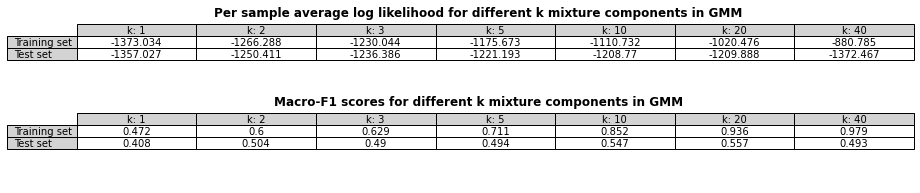

In [10]:
# Create two dataframes with the results for the log likelihood and macro-F1 scores
loglike_df = pd.DataFrame(data=[[round(c, 3) for c in loglikescores_trn], [round(c, 3) for c in loglikescores_tst]], 
                          index=['Training set', 'Test set'], 
                          columns=['k: ' + str(k) for k in k_gmmlist])
f1scores_df = pd.DataFrame(data=[[round(c, 3) for c in f1_trn_scores], [round(c, 3) for c in f1_tst_scores]], 
                          index=['Training set', 'Test set'], 
                          columns=['k: ' + str(k) for k in k_gmmlist])

# Display results for the log likelihood and macro-F1 scores in two separate tables
fig, ax = plt.subplots(2, 1, figsize=(15, 3))
loglike_tab = ax[0].table(cellText=loglike_df.values, rowLabels=loglike_df.index, colLabels=loglike_df.columns, 
                          cellLoc='center', loc='upper left', 
                          rowColours=['lightgray']*2, colColours=['lightgray']*len(k_gmmlist))
ax[0].set_title('Per sample average log likelihood for different k mixture components in GMM', fontweight='bold')
loglike_tab.set_fontsize(10)
ax[0].set_axis_off()
f1scores_tab = ax[1].table(cellText=f1scores_df.values, rowLabels=f1scores_df.index, colLabels=f1scores_df.columns, 
                           cellLoc='center', loc='upper left',
                           rowColours=['lightgray']*2, colColours=['lightgray']*len(k_gmmlist))
ax[1].set_title('Macro-F1 scores for different k mixture components in GMM', fontweight='bold')
loglike_tab.set_fontsize(10)
ax[1].set_axis_off()
plt.show()

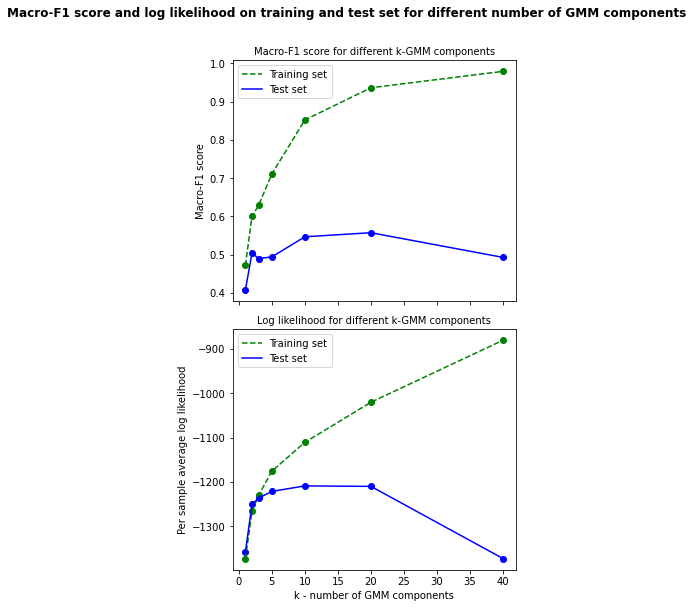

In [11]:
# Plot the log likelihood and macro-F1 scores for the different number of GMM mixture components k
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 8))

ax[0].plot(k_gmmlist, f1_trn_scores, 'g--')
ax[0].scatter(k_gmmlist, f1_trn_scores, c='g')
ax[0].plot(k_gmmlist, f1_tst_scores, 'b-')
ax[0].scatter(k_gmmlist, f1_tst_scores, c='b')
ax[0].set_ylabel('Macro-F1 score')
ax[0].legend(['Training set', 'Test set'], loc='best')
ax[0].set_title('Macro-F1 score for different k-GMM components', fontsize=10)

ax[1].plot(k_gmmlist, loglikescores_trn, 'g--')
ax[1].scatter(k_gmmlist, loglikescores_trn, c='g')
ax[1].plot(k_gmmlist, loglikescores_tst, 'b-')
ax[1].scatter(k_gmmlist, loglikescores_tst, c='b')
ax[1].set_ylabel('Per sample average log likelihood')
ax[1].set_xlabel('k - number of GMM components')
ax[1].legend(['Training set', 'Test set'], loc='best')
ax[1].set_title('Log likelihood for different k-GMM components', fontsize=10)

plt.suptitle('Macro-F1 score and log likelihood on training and test set for different number of GMM components', 
             y=1.05, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

(2)

We observe that the macro-F1 score and the log likelihood start from very low values for k=1 mixture component thus indicating very bad performance of the GMMs for classification. As the number of mixture components k increases both evaluation measures show improvement, however for very large k values our model will tend to overfit on the training data and show high scores in the training set (thus low error) but low scores in the test set (thus high error). 

As described in Q3.2 the macro-F1 score is an evaluation measure of the model's classification accuracy defined as the harmonic mean between recall and precision scores. An F1 score of 1 is an indication of perfect precision and recall whereas an F1 score of 0 suggests that the model is failing. By using the 'macro' F1 score, all classes are considered equally important thus not taking any class imbalance into account. The per-sample average log likelihood is an indication of the model's fit to the given data. A high log likelihood shows a high probability that our data was generated from this Gaussian mixture model.

In the training set we see that the macro-F1 score and the per-sample average log likelihood improve continuously as the number of GMM components increases. The improvement in the per-sample average log likelihood shows that as we add more mixture components the likelihood that our training data were generated from that GMM mixture increases. Similarly, the macro-F1 in the training set also continuously improves as the number of GMM components increases showing that classification improves with more mixture components. This is expected, as adding more mixture components will increase the complexity of the GMM and overfit to the training data, at the expense of a worse fit to the test data.

Indeed, by looking at the results on the test set we see that this is a case of the model overfitting on the training data. In the test set we see that the macro-F1 score and log likelihood improve as the number of GMM components increases up to 20 and after that it drops. This is an indication that our GMM model has most likely become too complex and inflexible after 20 mixture components. With k>20 components the model fits the training data a bit too well (high variance-low bias) and is unable to generalise well in unseen data, our test set.

\pagebreak